# Identifying phishing mails by using URL and mail features and ML based classification tools

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constructing-Dataset" data-toc-modified-id="Constructing-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constructing Dataset</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries-and-defining-constants" data-toc-modified-id="Importing-libraries-and-defining-constants-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing libraries and defining constants</a></span></li><li><span><a href="#Downloading-and-extracting-mails-(phishing-and-ham-mails)" data-toc-modified-id="Downloading-and-extracting-mails-(phishing-and-ham-mails)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Downloading and extracting mails (phishing and ham mails)</a></span></li><li><span><a href="#Loading-mails" data-toc-modified-id="Loading-mails-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loading mails</a></span></li></ul></li><li><span><a href="#Data-preprocessing-and-features-extraction" data-toc-modified-id="Data-preprocessing-and-features-extraction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing and features extraction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Dropping-duplicates" data-toc-modified-id="Dropping-duplicates-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Dropping duplicates</a></span></li><li><span><a href="#UnderSampling" data-toc-modified-id="UnderSampling-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>UnderSampling</a></span></li></ul></li><li><span><a href="#Word-Cloud-Analysis" data-toc-modified-id="Word-Cloud-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Word Cloud Analysis</a></span></li><li><span><a href="#Mail-Features-extraction-functions" data-toc-modified-id="Mail-Features-extraction-functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mail Features extraction functions</a></span><ul class="toc-item"><li><span><a href="#Mail-body-features" data-toc-modified-id="Mail-body-features-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Mail body features</a></span></li><li><span><a href="#URL-features" data-toc-modified-id="URL-features-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>URL features</a></span></li><li><span><a href="#Subject-line-features" data-toc-modified-id="Subject-line-features-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Subject line features</a></span></li><li><span><a href="#Sender's-address-features" data-toc-modified-id="Sender's-address-features-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Sender's address features</a></span></li></ul></li><li><span><a href="#Constructing-dataset-by-extracting-features" data-toc-modified-id="Constructing-dataset-by-extracting-features-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Constructing dataset by extracting features</a></span></li></ul></li><li><span><a href="#Split-Training-and-Testing-data" data-toc-modified-id="Split-Training-and-Testing-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split Training and Testing data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Checking-dataset" data-toc-modified-id="Checking-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checking dataset</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#Visualization:-Matplotlib" data-toc-modified-id="Visualization:-Matplotlib-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visualization: Matplotlib</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#PCA-for-visualization" data-toc-modified-id="PCA-for-visualization-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>PCA for visualization</a></span></li><li><span><a href="#PCA-for-dimentionality-reduction" data-toc-modified-id="PCA-for-dimentionality-reduction-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>PCA for dimentionality reduction</a></span></li></ul></li><li><span><a href="#t-SNE-using-Scikit-Learn" data-toc-modified-id="t-SNE-using-Scikit-Learn-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>t-SNE using Scikit-Learn</a></span></li><li><span><a href="#Single-Value-Decomposition" data-toc-modified-id="Single-Value-Decomposition-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Single Value Decomposition</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Variance-Filter" data-toc-modified-id="Variance-Filter-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Variance Filter</a></span></li><li><span><a href="#Feature-Importance-with-Random-Forest-Regressor" data-toc-modified-id="Feature-Importance-with-Random-Forest-Regressor-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Feature Importance with Random Forest Regressor</a></span></li><li><span><a href="#Univariate-using-SelectKBest" data-toc-modified-id="Univariate-using-SelectKBest-4.7.3"><span class="toc-item-num">4.7.3&nbsp;&nbsp;</span>Univariate using SelectKBest</a></span></li><li><span><a href="#High-Correlation-Filter" data-toc-modified-id="High-Correlation-Filter-4.7.4"><span class="toc-item-num">4.7.4&nbsp;&nbsp;</span>High Correlation Filter</a></span></li></ul></li></ul></li><li><span><a href="#Selecting-Best-Classifiers" data-toc-modified-id="Selecting-Best-Classifiers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Selecting Best Classifiers</a></span></li><li><span><a href="#Machine-Learning-Models" data-toc-modified-id="Machine-Learning-Models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Machine Learning Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>SVC</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#ExtraTrees-Classifier" data-toc-modified-id="ExtraTrees-Classifier-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>ExtraTrees Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li></ul></li><li><span><a href="#Fine-tuning-selected-models" data-toc-modified-id="Fine-tuning-selected-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fine tuning selected models</a></span><ul class="toc-item"><li><span><a href="#ExtraTrees-Classifier" data-toc-modified-id="ExtraTrees-Classifier-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>ExtraTrees Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>SVC</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Ensemble-Model-(Voting-Classifier)" data-toc-modified-id="Ensemble-Model-(Voting-Classifier)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ensemble Model (Voting Classifier)</a></span></li><li><span><a href="#Performance-Comparisons" data-toc-modified-id="Performance-Comparisons-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Performance Comparisons</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Future Work</a></span></li></ul></div>

## Constructing Dataset

### Importing libraries and defining constants

In [1]:
import os
from bs4 import BeautifulSoup
import mailparser
from collections import OrderedDict
import email
from urllib.request import urlretrieve
import tarfile
import shutil
import numpy as np
import glob
import mailparser
import re 
import tldextract
import urllib.request
import warnings
import logging
import csv
import sys
import logging
import logging.config
import yaml
import pandas as pd
from logging import Formatter
from logging.handlers import RotatingFileHandler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
warnings.filterwarnings("ignore")
# sns.set_theme()
URLREGEX = r"^(https?|ftp)://[^\s/$.?#].[^\s]*$"
URLREGEX_NOT_ALONE = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
FLASH_LINKED_CONTENT = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])+).*\.swf"
HREFREGEX = '<a\s*href=[\'|"](.*?)[\'"].*?\s*>'
IPREGEX = r"\b((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?))\b"
MALICIOUS_IP_URL = r"\b((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\/(www|http|https|ftp))\b"
EMAILREGEX = r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"
GENERAL_SALUTATION = r'\b(dear|hello|Good|Greetings)(?:\W+\w+){0,6}?\W+(user|customer|seller|buyer|account holder)\b'
MAILS_DIR = 'C:/Users/hahah/Documents/NCKH/2023/của Phương/mails'
TAR_DIR = os.path.join(MAILS_DIR, 'tar')
phishing_dir = 'C:/Users/hahah/Documents/NCKH/2023/của Phương/mails/phishingMails'
ham_dir_1 = 'C:/Users/hahah/Documents/NCKH/2023/của Phương/mails/hard_ham'
ham_dir_2 = 'C:/Users/hahah/Documents/NCKH/2023/của Phương/mails/easy_ham_2'



### Downloading and extracting mails (phishing and ham mails)

In [3]:
def download_dataset(url):
    """download and unzip data from a url into the specified path"""
    logger.info("Downloading dataset from '%s'",url)
    # create directory if it doesn't exist
    if not os.path.isdir(TAR_DIR):
        os.makedirs(TAR_DIR)

    filename = url.rsplit('/', 1)[-1]
    tarpath = os.path.join(TAR_DIR, filename)
    print(filename)
    # download the tar file if it doesn't exist
    try:
        tarfile.open(tarpath)
        logger.info("Opened tar '%s'",tarpath)
    except:
        urlretrieve(url, tarpath)
        logger.info("Retrieving from URL '%s'",url)

    with tarfile.open(tarpath) as tar:
        dirname = os.path.join(MAILS_DIR, tar.getnames()[0])
        logger.info("Directory Name '%s'",dirname)
        if os.path.isdir(dirname):
            shutil.rmtree(dirname)
        tar.extractall(path=MAILS_DIR)

        cmds_path = os.path.join(dirname, 'cmds')
        if os.path.isfile(cmds_path):
            os.remove(cmds_path)

    return dirname

In [4]:
import logging.config

# Define the logging configuration
config = {
    'version': 1,
    'handlers': {
        'console': {
            'class': 'logging.StreamHandler',
            'level': 'DEBUG',
            'formatter': 'simple',
            'stream': 'ext://sys.stdout'
        }
    },
    'formatters': {
        'simple': {
            'format': '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        }
    },
    'root': {
        'level': 'INFO',
        'handlers': ['console']
    }
}

# Configure logging using the config
logging.config.dictConfig(config)

# Get the logger instance
logger = logging.getLogger('PhishingMailClassifier')

# Log some messages
logger.debug('often makes a very good meal of %s', 'visiting tourists')
logger.info("Project Started\nConstants defined and libraries imported")

# Define other variables as needed
alexa_rank_cache = {}
cache_hit = 0
cache_miss = 0

2023-03-18 05:40:42,117 - PhishingMailClassifier - INFO - Project Started
Constants defined and libraries imported


In [5]:
logging.config.dictConfig(config)
logger = logging.getLogger('PhishingMailClassifier')
logger.debug('often makes a very good meal of %s', 'visiting tourists')
logger.info("Project Started\nConstants defined and libraries imported")
    
alexa_rank_cache = {}
cache_hit = 0
cache_miss = 0

In [6]:
#ham_dir = download_dataset(HAM_URL)
# logger.info("Downloaded Easy Ham Mails")
#hard_ham_dir = download_dataset(HARD_HAM_URL)
# logger.info("Downloaded Hard Ham Mails")
#phishing_dir = download_dataset(PHISHING_URL)
# logger.info("Downloaded Easy Phishing Mails")

### Loading mails

In [7]:
def load_mails(dirpath):
    """load emails from the specified directory"""
    files = []
    filepaths = glob.glob(dirpath + '/*')
    for path in filepaths:
        with open(path, 'rb') as f:
            byte_content = f.read()
            str_content = byte_content.decode('utf-8', errors='ignore')
            files.append(str_content)
    logger.info("Loaded mails from '%s'",dirpath)
    return files

In [8]:
# load the datasets

phishing = load_mails(phishing_dir)
print("Number of phishing mails: ",len(phishing))
logger.debug("Number of phishing mails: %d",len(phishing))
ham = load_mails(ham_dir_1)
ham = ham + load_mails(ham_dir_2)
print("Number of ham mails: ",len(ham))
logger.debug("Number of ham mails: %d",len(ham))

Number of phishing mails:  2239
Number of ham mails:  1854


## Data preprocessing and features extraction

#### Dropping duplicates

In [9]:
phishing = list(set(phishing))
ham = list(set(ham))
print("Number of phishing mails ",len(phishing))
print("Number of ham mails ",len(ham))

Number of phishing mails  2239
Number of ham mails  1835


#### UnderSampling 

### Word Cloud Analysis

In [10]:
def getMailBody(mail):
    try:
        parsed_mail = mailparser.parse_from_string(mail)
        mail_body = parsed_mail.body.lower()
        subject = parsed_mail.subject
        headers = parsed_mail.headers
        
    except UnicodeDecodeError as Argument:
        parsed_mail = email.message_from_string(mail)
        body = ""
        if parsed_mail.is_multipart():
            for part in parsed_mail.walk():
                # returns a bytes object
                payload = part.get_payload(decode=True)
                strtext = payload.decode()
                body += strtext
        else:
            payload = parsed_mail.get_payload(decode=True)
            strtext = payload.decode()
            body += strtext
        headers = email.parser.HeaderParser().parsestr(mail)
        mail_body = body.lower()
        subject = headers['Subject']
    return [mail_body,subject,headers]

In [11]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from  nltk.tokenize import word_tokenize
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
#nltk.download()
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
import textdistance

  
stop_words = set(stopwords.words('english')) #set of stopwords
 
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r'',cleaned)
    return  cleaned
def filter_words_mail_body(mails):
    for mail in mails:
        filtered = []
        filtered_text = cleanpunc(cleanhtml(getMailBody(mail)[0]))
        word_tokens = word_tokenize(filtered_text)
        for w in word_tokens:
                if w not in stop_words and w.isalpha():
        #            w = lemmatizer.lemmatize(w)
                    filtered.append(w)
    return (filtered)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hahah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hahah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hahah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


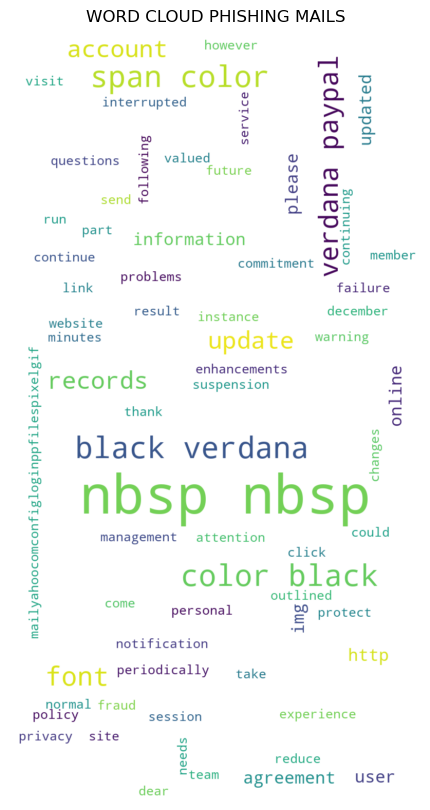

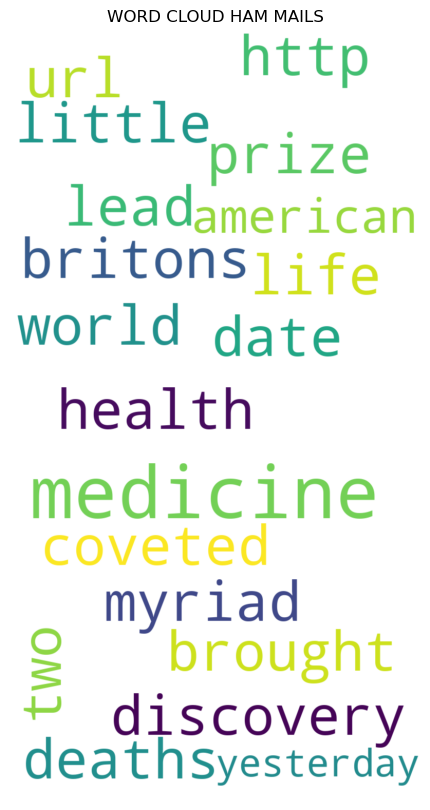

In [13]:
#Visualize words in mail phishing
words_filtered = filter_words_mail_body(phishing)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=stop_words, max_words = 20000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD PHISHING MAILS")
plt.show()


words_filtered = filter_words_mail_body(ham)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=stop_words, max_words = 20000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD HAM MAILS")
plt.show()


In [14]:
# !pip3 install textdistance

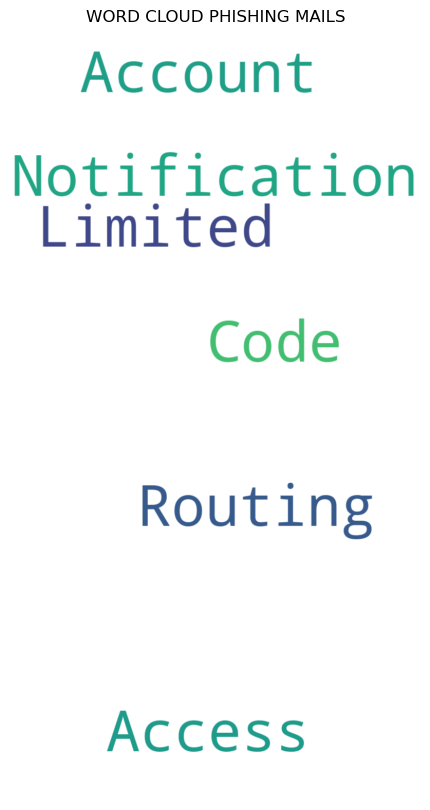

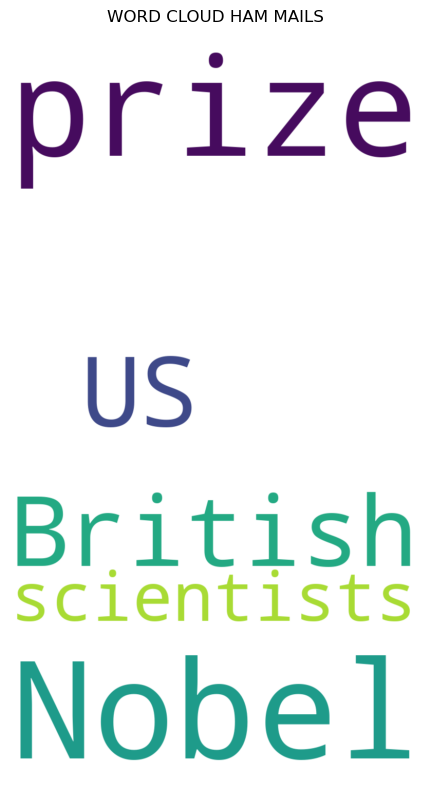

In [15]:
def filter_words_subject(mails):
    for mail in mails:
        filtered = []
        filtered_text = ((getMailBody(mail)[1]))
        word_tokens = word_tokenize(filtered_text)
        for w in word_tokens:
                if w not in stop_words and w.isalpha():
#                     w = lemmatizer.lemmatize(w)
                    filtered.append(w)
    return (filtered)

words_filtered = filter_words_subject(phishing)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=42,stopwords=STOPWORDS, max_words = 20000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD PHISHING MAILS")
plt.show()


words_filtered = filter_words_subject(ham)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=42,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD HAM MAILS")
plt.show()

### Mail Features extraction functions

#### Mail body features

In [16]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned



def cleanBody(mail_body):
        filtered = []
        filtered_text = cleanpunc(cleanhtml(mail_body))
        word_tokens = word_tokenize(filtered_text)
        for w in word_tokens:
                if w not in stop_words and w.isalpha():
                    filtered.append(w)
        return filtered

def presenceHTML(mail):
    msg = email.message_from_string(mail)
    return int((msg.get_content_type() == 'text/html') == True)
  

def presenceHTMLFORM(message):
    return int((re.compile(r'<\s?\/?\s?form\s?>', re.IGNORECASE).search(message)
             != None) == True)


def presenceHTMLIFRAME(message):
    return int(re.compile(r'<\s?\/?\s?iframe\s?>',
                      re.IGNORECASE).search(message) != None) == True


def presenceJavaScript(message):
    return int(re.compile(r'<\s?\/?\s?script\s?>',
                      re.IGNORECASE).search(message) != None) == True


def presenceFlashContent(message):
    swflinks = re.compile(
        r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])+).*\.swf",
        re.IGNORECASE).findall(message)
    flashObject = re.compile(r'embed\s*src\s*=\s*\".*\.swf\"',
                             re.IGNORECASE).search(message)
    return int((swflinks != None and len(swflinks) > 0) or (flashObject != None)) == True


def presenceGeneralSalutation(message):
    return int(re.compile(GENERAL_SALUTATION,re.IGNORECASE).search(message) != None) == True


def numberOfAttachments(raw_mail):
    try:
        mail = mailparser.parse_from_string(raw_mail)
        count = len(mail.attachments)
        return count
    except:
        return 0

def mail_to(mail_body):
    return int(re.compile(r'mailto:',
                      re.IGNORECASE).search(mail_body) != None) == True

def popups(mail_body):
    if re.compile(r'window.open|onclick',re.IGNORECASE).search(mail_body):
         return 1
    return 0
       
def body_richness(mail_body):
    mail_body = cleanBody(mail_body)
    if len(set(mail_body))!=0:
        return (len(mail_body)/len(set(mail_body)))
    else:
        return len(mail_body)

#### URL features

In [17]:



def isURL(link):
    return re.compile(URLREGEX, re.IGNORECASE).search(link) is not None


def getURLs(mail_body):
    result = []
    cleanPayload = re.sub(r'\s+', ' ', mail_body)
    soup = BeautifulSoup(cleanPayload, 'html.parser')
    links = soup.find_all('a')
    i = 0
    for link in links:
        links[i] = link.get('href')
        i += 1

    for link in links:
        if isinstance(link, str) or isinstance(link, bytes):
            if isURL(link):
                result.append(link)
        else:
            continue

    urlregex = re.compile(URLREGEX_NOT_ALONE, re.IGNORECASE)
    links = urlregex.findall(cleanPayload)

    for link in links:
        if link not in result:
            result.append(link)

    res = list(OrderedDict.fromkeys(result))
    result = list(set(result))
    return result


def IPasURL(urls):
    result = []
    count = 0
    for url in urls:
        if re.compile(IPREGEX, re.IGNORECASE).search(url) and re.compile(IPREGEX, re.IGNORECASE).search(url).group(1) is not None:
            result.append(re.compile(IPREGEX, re.IGNORECASE).search(url).group(1))
            count += 1
    return count


def textLinkDisparity(mail_body):
    count = 0
    soup = BeautifulSoup(mail_body, 'html.parser')
    lists = soup.find_all('a')
    for item in lists:
        link = item.get('href')
        for string in item.stripped_strings:
            text = str(string)
            text = text.strip().replace('\n', '')
            text = text.strip().replace('\t', ' ')
            if isURL(text) and text != link:
                count += 1
    return count


def maliciousURL(urls):
    count = 0
    for url in urls:
        if ((re.compile(IPREGEX, re.IGNORECASE).search(url)
             is not None) == True or (len(re.compile(r'(https?://)',re.IGNORECASE).findall(url)) > 1)
                or (len(re.compile(r'(www.)',re.IGNORECASE).findall(url)) > 1)
                or (len(re.compile(r'(\.com|\.org|\.co)',re.IGNORECASE).findall(url)) > 1))== True:
            count += 1
    return count


def hexadecimalURL(urls):
    count = 0
    for url in urls:
        if ((re.compile(r'%[0-9a-fA-F]+', re.IGNORECASE).search(url)
             is not None) == True):
            count += 1
    return count


def getAlexaRank(domain):
    if domain in alexa_rank_cache:
#         cache_hit +=1
        return int(alexa_rank_cache[domain])
#     else:
#         cache_miss += 1
    try:
        xml = urllib.request.urlopen(
            'http://data.alexa.com/data?cli=10&dat=s&url=%s' %
            domain).read().decode('utf-8')
    except:
        alexa_rank_cache[domain] = 0
        return 0
    try:
        rank = (re.compile(r'RANK="(\d+)"',re.IGNORECASE).findall(xml))[1]
    except:
        rank = -1
    alexa_rank_cache[domain] = rank
    return int(rank)


def extractDomains(urls):
    domain_set = set()
    for url in urls:
        domain = tldextract.extract(url).registered_domain
        if domain not in domain_set:
            domain_set.add(domain)
        else:
            continue

    return list(domain_set)


def domainCounts(url):
    domains = tldextract.extract(url)
    count = (len(re.compile(r'\.',re.IGNORECASE).findall( domains.subdomain))) + \
        ((len(re.compile(r'\.',re.IGNORECASE).findall( domains.domain)))+1)
    if re.compile(IPREGEX,re.IGNORECASE).search(domains.domain) is not None:
        count -= 3
    return (count)


def presenceBadRankedURL(urls):
    domains = extractDomains(urls)
    max_rank = 0
    for domain in domains:
        rank = getAlexaRank(domain)
        max_rank = max(rank, max_rank)
        if rank == -1:
            return 0
    if max_rank > 70000:
        return 1
    return 0

def maxDomainsCounts(urls):
    count = 1
    for url in urls:
        count = max(domainCounts(url), count)
    return count

def at_in_url(urls):
    for url in urls:
        if (re.compile(r'@',re.IGNORECASE).search(url)):
            return 1
        else: 
            continue
    return 0
import json
import ast
def writeCache():
    with open('./cache/alexa_rank_cache.txt', 'w') as cache_file:
        cache_file.write(json.dumps(alexa_rank_cache))
        logger.info("Cache written")
        

def loadCache():
    try:
        with open('./cache/alexa_rank_cache.txt','r') as cache_file:
            cache = ast.literal_eval(cache_file.read())
            alexa_rank_cache = cache
            logger.info("Cache loaded")
    except FileNotFoundError:
        log.warning("No alexa rank cache found")


#### Subject line features

In [18]:


def isRepliedMail(subject):
    return (subject).startswith('Re:')

def isForwardedMail(subject):
    return (subject).startswith('Fwd:')

def subject_richness(subject):
    texts = subject.split()
    if len(set(texts))!=0:
        return (len(texts)/len(set(texts)))
    else:
        return len(texts)
def contains_verify(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('verify',w)) >0.9:
            return 1
     return 0

def contains_update(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('update',w)) >0.9:
            return 1
     return 0

def contains_access(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('access',w)) >0.9:
            return 1
     return 0
# def get_top_n_words(corpus, n=None):
#     filtered = []
#     for word in corpus:
#         word = stemmer.stem(word)
#         word = lemmatizer.lemmatize(word)
#         filtered+=word
#     corpus = set(filtered)
#     vec = CountVectorizer().fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]

# body = ""
# for mail in phishing:
#     body += getMailBody(mail)[0]
#     body+=" "
# print(get_top_n_words(body))
def contains_prime_targets(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if ((jaro('bank',w)) >0.9 or (jaro('Paypal',w)) >0.9 or (jaro('ebay',w)) >0.9 or (jaro('amazon',w)) >0.9):
            return 1
     return 0

def contains_account(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('account',w)) >0.9 or jaro('profile',w) >0.9 or jaro('handle',w) >0.9 :
            return 1
     return 0
    
def contains_suspended(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (((jaro('closed',w)) or jaro('expiration',w))or jaro('suspended',w)) >0.9 or jaro('terminate',w) >0.9 or jaro('restricted',w) >0.9:
            return 1
     return 0

def contains_password(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('password',w)) >0.9 or jaro('credential',w) > 0.9:
            return 1
     return 0

def contains_urgent(subject):
    subject = purify(subject)
    jaro = textdistance.Jaro()
    for w in subject.split():
        if (jaro('urgent',w)) >0.9 or jaro('immediate',w) >0.9:
           return 1
    return 0

def purify(subject):
    filtered = ""
    word_tokens = word_tokenize(subject)
    for w in word_tokens:
         if w not in stop_words and w.isalpha():
                   w = stemmer.stem(w)
                   filtered+=(lemmatizer.lemmatize(w))
                   filtered+=" "
    return filtered


#### Sender's address features

In [19]:
def number_of_dots(headers):
    try:
        sender = headers.get("From", "")
        return len(re.compile(r'\.',re.IGNORECASE).findall(sender))
    except KeyError as Argument:
        return 0
def number_of_dash(headers):
    try:
        subject = headers.get("Subject", "")
        return len(re.compile(r'\-',re.IGNORECASE).findall(subject))
    except KeyError as Argument:
        return 0
   


### Constructing dataset by extracting features

In [20]:
filename = "./dataset/mails_dataset.csv"
fields = [
     "HTML", "HTMLForm", "IFrame", "FlashContent", "General Salutation",
    "Javascript", "mailto:","popups","body richness","Number of URLs", "Malicious URL", "text link disparity",
    "Attachments", "IP URLs", "hexadecimal URL", "Bad Rank Domain",
    "Maximum Domains Counts","@_in_url","Subject richness","Fwd: mail","Re: mail","contains account","contains verify",
    "contains update","contains prime targets","contains suspension","contains password","contains urgent","contains access",
    "number of dots","number of dash","Class"
]
rows = []


def constructDataSet(messages, label):
    i = 1
    
    for mail in messages:
        parsed_mail = getMailBody(mail)
        
        mail_body = parsed_mail[0]
        mail_subject = parsed_mail[1]
        mail_headers = parsed_mail[2]
        
        urls = getURLs(mail_body)
        feature = [0] * (len(fields))
        i = 0
        feature[i]= int(presenceHTML(mail)==True)
        i+=1
        feature[i]= int(presenceHTMLFORM(mail_body)==True)
        i+=1
        feature[i]= int(presenceHTMLIFRAME(mail_body)==True)
        i+=1
        feature[i]= int(presenceFlashContent(mail_body)==True)
        i+=1
        feature[i]= int(presenceGeneralSalutation(mail_body)==True)
        i+=1
        feature[i]= int(presenceJavaScript(mail_body)==True)
        i+=1
        feature[i]= int(mail_to(mail_body)==True)
        i+=1
        feature[i]= popups(mail_body)
        i+=1
        feature[i] = body_richness(mail_body)
        i+=1
        feature[i]= len(urls)
        i+=1
        feature[i]= (maliciousURL(urls))
        i+=1
        feature[i]= textLinkDisparity(mail_body)
        i+=1
        feature[i] = numberOfAttachments(mail)
        i+=1
        feature[i] = (IPasURL(urls))
        i+=1
        feature[i] = (hexadecimalURL(urls))
        i+=1
        feature[i] = int(presenceBadRankedURL(urls)==True)
        i+=1
        feature[i] = (maxDomainsCounts(urls))
        i+=1
        feature[i]= at_in_url(urls)
        i+=1
        feature[i] = subject_richness(mail_subject)
        i+=1
        feature[i]= int(isForwardedMail(mail_subject)==True)
        i+=1
        feature[i]= int(isRepliedMail(mail_subject)==True)
        i+=1
        feature[i]= int(contains_account(mail_subject)== True)
        i+=1
        feature[i]= int(contains_verify(mail_subject)==True)
        i+=1
        feature[i]= int(contains_update(mail_subject)==True)
        i+=1
        feature[i]= int(contains_prime_targets(mail_subject)==True)
        i+=1
        feature[i]= int(contains_suspended(mail_subject)==True)
        i+=1
        feature[i]= int(contains_password(mail_subject)==True)
        i+=1
        feature[i]= int(contains_urgent(mail_subject)==True)
        i+=1
        feature[i] = int(contains_access(mail_subject)==True)
        i+=1
        feature[i]= number_of_dots(mail_headers)
        i+=1
        feature[i]= number_of_dash(mail_headers)
        i+=1
        feature[i] = label
        rows.append(feature)

In [21]:
def constructDataSet_nlp_feature(messages, label):
    i = 1
    
    for mail in messages:
        parsed_mail = getMailBody(mail)
        
        mail_body = parsed_mail[0]
        mail_subject = parsed_mail[1]
        mail_headers = parsed_mail[2]

In [22]:
def writeCSV():
    with open(filename, 'w', newline='') as csvfile:
        
        # creating a csv writer object
        csvwriter = csv.writer(csvfile)

        # writing the fields
        csvwriter.writerow(fields)

        # writing the data rows
        csvwriter.writerows(rows)
        #logger.info("CSV written to %s",filename)
        print("written CSV")

In [23]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hahah\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:
rows.clear()
#loadCache()
logger.debug("Started Constructing Dataset for Ham mail")
print("HAM MAILS")
constructDataSet(ham, "Ham")
print(rows)
print("PHISHING MAILS")
logger.debug("Started Constructing Dataset for Phishing mail")
constructDataSet(phishing, "Phishing")
writeCSV()
writeCache()

HAM MAILS
[[0, 0, 0, 0, 0, 0, 0, 0, 1.1193181818181819, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1.0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 'Ham'], [0, 0, 0, 0, 0, 0, 0, 0, 1.1627906976744187, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1.0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 'Ham'], [0, 0, 0, 0, 0, 0, 0, 0, 1.1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 'Ham'], [0, 0, 0, 0, 0, 0, 0, 0, 1.2380952380952381, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1.0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 'Ham'], [0, 0, 0, 0, 0, 0, 0, 0, 1.2692307692307692, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 'Ham'], [0, 0, 0, 0, 0, 0, 0, 0, 1.6849315068493151, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 'Ham'], [0, 0, 0, 0, 0, 0, 0, 0, 1.4285714285714286, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 'Ham'], [0, 0, 0, 0, 0, 0, 0, 0, 1.216867469879518, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1.0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 'Ham'], [0, 0, 0, 0, 0, 0, 0, 0, 1.2164179104

In [25]:
mails = pd.read_csv("./dataset/mails_dataset.csv")
print("Number of Ham class records: ",len(mails[mails['Class'] == 'Ham']))
print("Number of Phishing class records: ",len(mails[mails['Class'] == 'Phishing']))

Number of Ham class records:  1835
Number of Phishing class records:  2239


## Split Training and Testing data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()
mails = pd.read_csv("./dataset/mails_dataset.csv")

labels=le.fit_transform(mails['Class'])

mails.drop('Class',axis =1,inplace=True)



X_train, X_test, Y_train, Y_test = train_test_split(mails,
                                                    labels,
                                                    test_size=0.20,
                                                    stratify=labels,
                                                    random_state=42)
# check dataset shapes
print(X_train.shape, (Y_train).shape)


(3259, 31) (3259,)


## Exploratory Data Analysis

### Checking dataset 

In [27]:
mails = X_train.copy(deep=True)
mails['Class'] =  pd.Series(Y_train, index=mails.index)

mails.describe()

,HTML,HTMLForm,IFrame,FlashContent,General Salutation,Javascript,mailto:,popups,body richness,Number of URLs,...,contains verify,contains update,contains prime targets,contains suspension,contains password,contains urgent,contains access,number of dots,number of dash,Class
count,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,...,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000
mean,0.303774,0.036514,0.014728,0.001227,0.115986,0.040503,0.057686,0.041117,1.574559,8.397975,...,0.010433,0.068119,0.195459,0.000614,0.001841,0.022093,0.045413,1.645597,0.305308,0.549555
std,0.459957,0.187595,0.120482,0.035018,0.320258,0.197167,0.233185,0.198591,0.694324,56.641373,...,0.101622,0.251989,0.396614,0.024769,0.042875,0.147008,0.208240,0.968767,0.645430,0.497615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.221871,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.404545,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.690161,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.250000,3117.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,7.000000,1.000000


In [28]:
#checking for missing values
# print(mails.isnull().sum())
mails.drop_duplicates(keep = "first", inplace = True)
print("Number of Ham class records: ",len(mails[mails['Class'] == 0]))
print("Number of Phishing class records: ",len(mails[mails['Class'] == 1]))
labels = mails['Class']
mails.drop('Class',axis=1,inplace=True)
mails.tail()

Number of Ham class records:  1407
Number of Phishing class records:  1486


,HTML,HTMLForm,IFrame,FlashContent,General Salutation,Javascript,mailto:,popups,body richness,Number of URLs,...,contains account,contains verify,contains update,contains prime targets,contains suspension,contains password,contains urgent,contains access,number of dots,number of dash
2619,0,0,0,0,0,0,0,0,1.000000,2,...,0,0,1,0,0,0,0,0,3,0
999,0,0,0,0,0,0,0,0,1.256410,1,...,0,0,0,0,0,0,0,0,1,0
2995,0,0,0,0,0,0,0,0,1.384615,2,...,0,0,1,0,0,0,0,0,3,0
2901,1,0,0,0,0,0,0,0,1.468085,1,...,1,0,0,0,0,0,0,0,1,0
948,0,0,0,0,0,0,0,0,1.263158,1,...,0,0,0,0,0,0,0,0,3,0


### Heatmap

<AxesSubplot:>

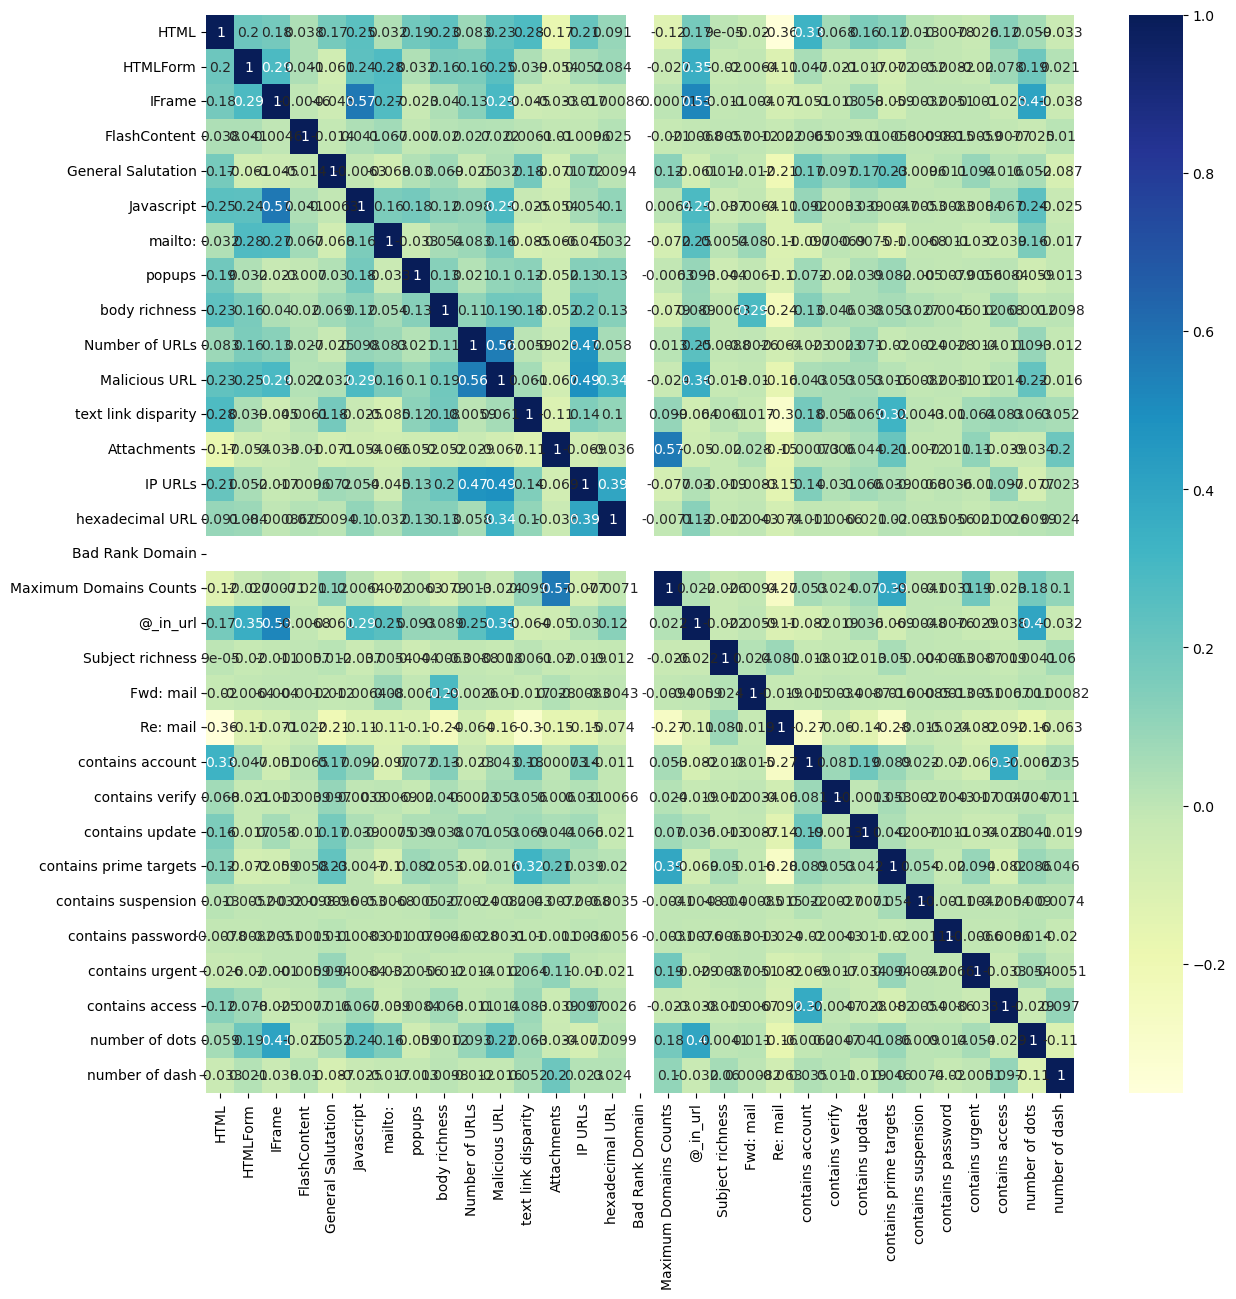

In [29]:
%matplotlib inline
plt.figure(figsize = (14,14))
sns.heatmap(mails.corr(),annot=True,cmap="YlGnBu")


As I can interpret from the heatmap shown in Figure 12, there is no such very strong correlation between features but I have decent correlation between:
- JavaScript and Iframe
- Iframe and @_in_url
- Text link disparity and maximum domains counts
- IP URLs and Number of URLs
- Malicious URL and Number of URLs <br>
These correlations are quite obvious trend revealed in the heatmap. As number of URLs increases the mail tend to be more malicious and have IP URLs. It also reveals that if a mail has many domains it is much likely to have text link disparity.

### Visualization: Matplotlib

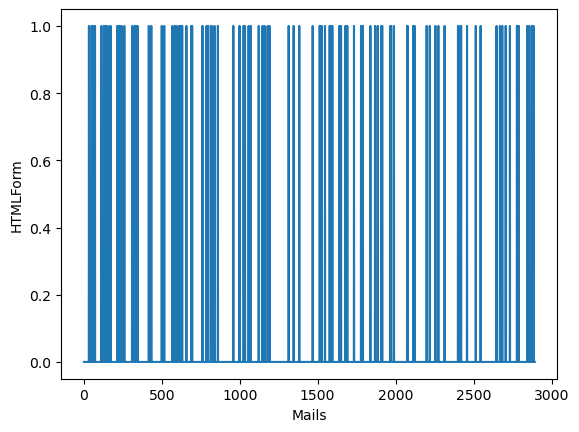

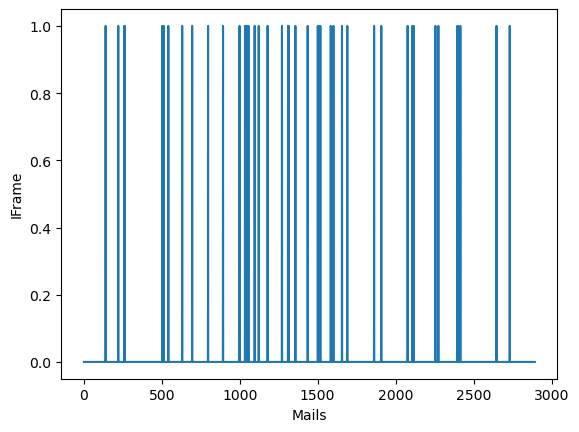

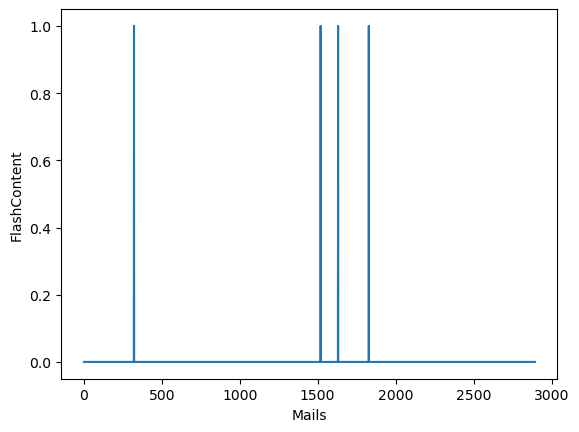

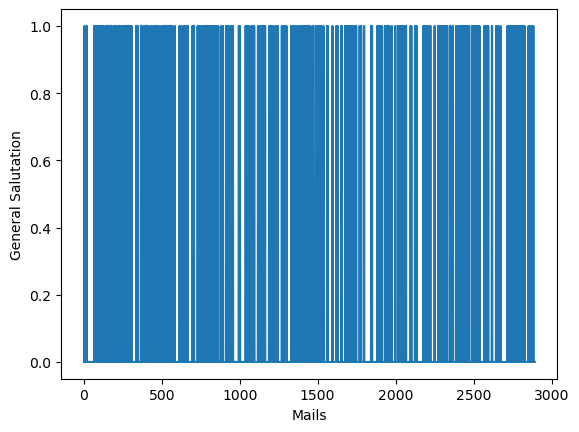

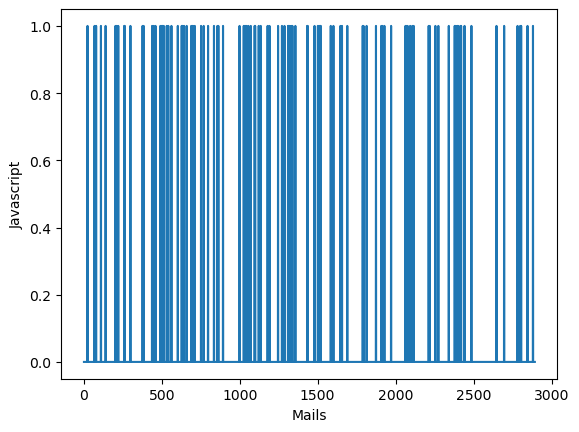

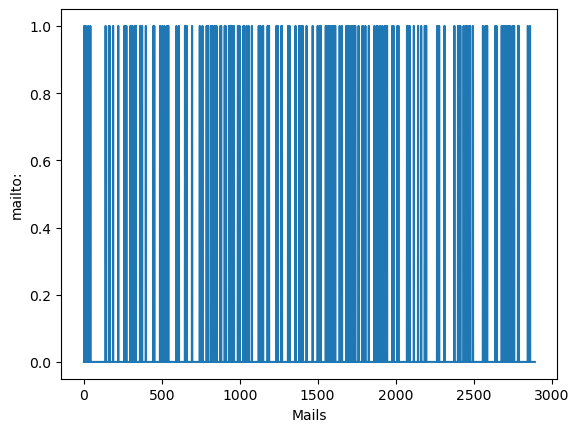

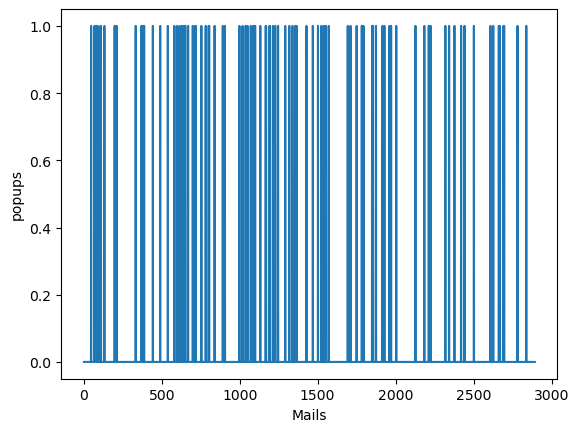

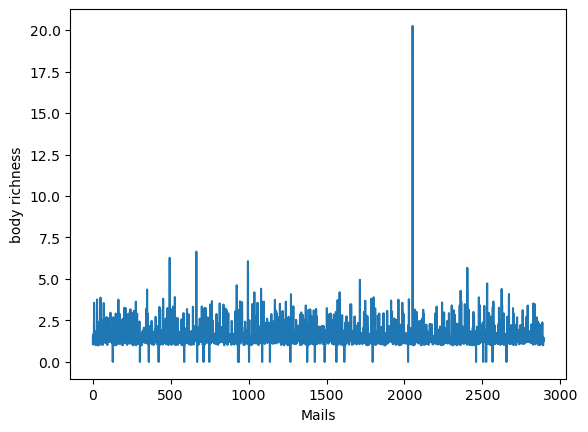

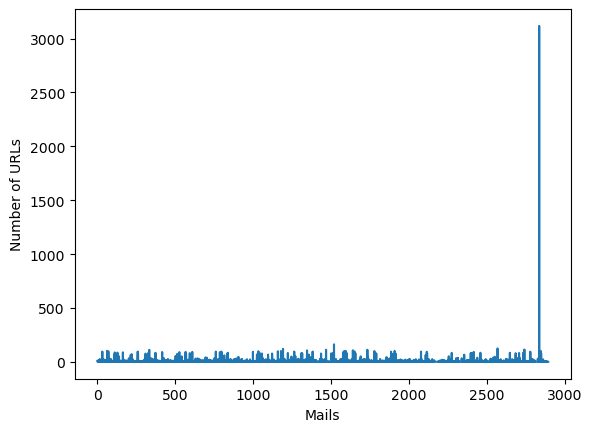

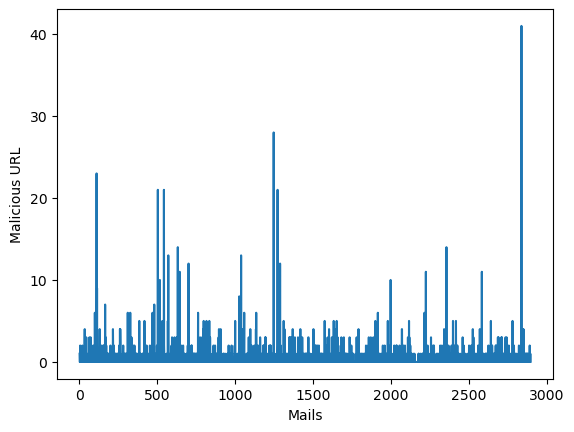

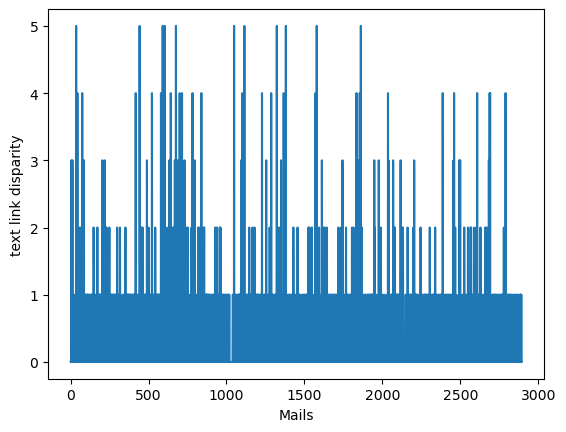

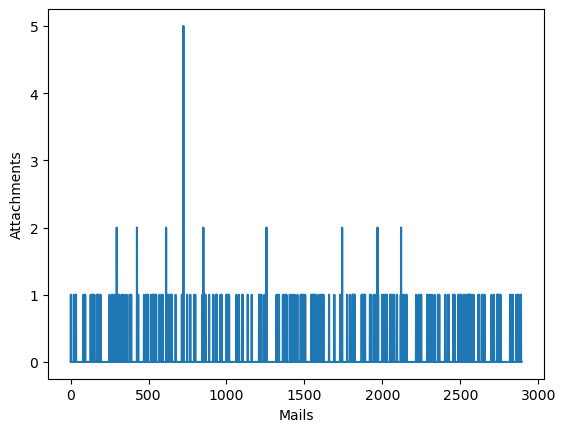

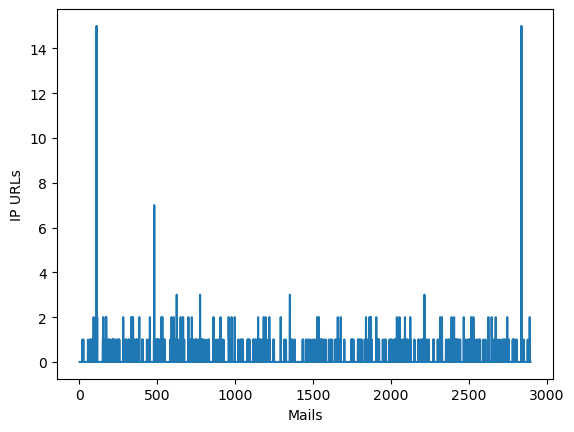

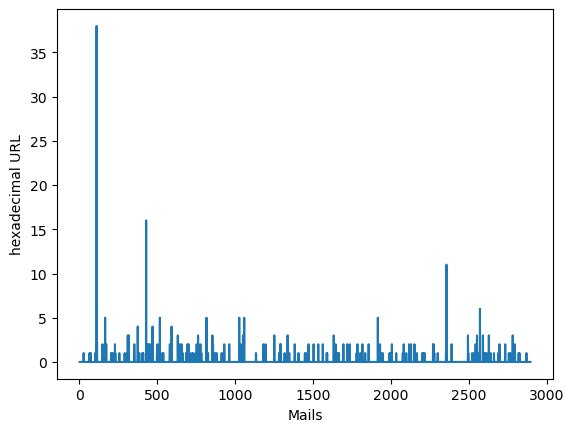

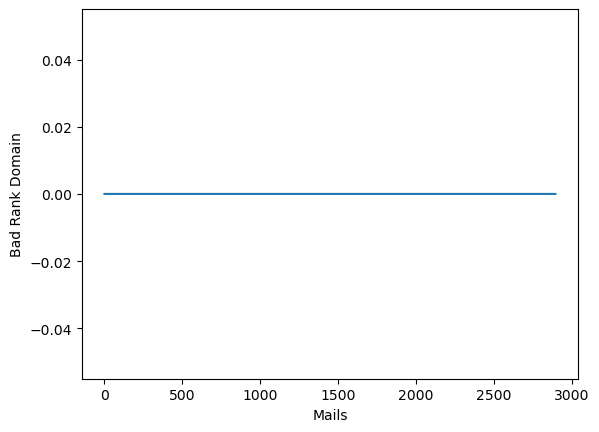

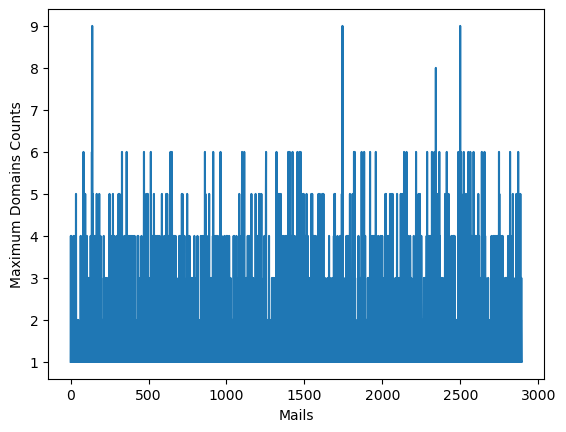

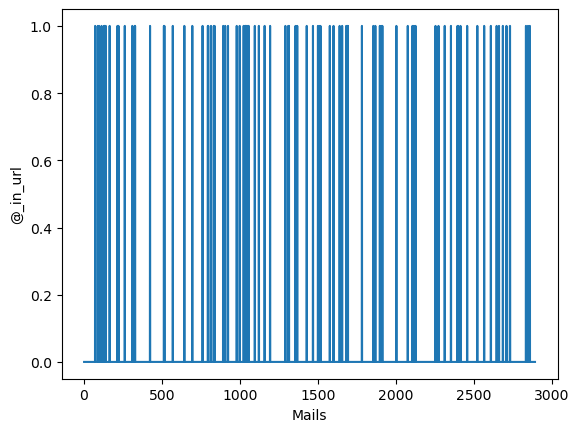

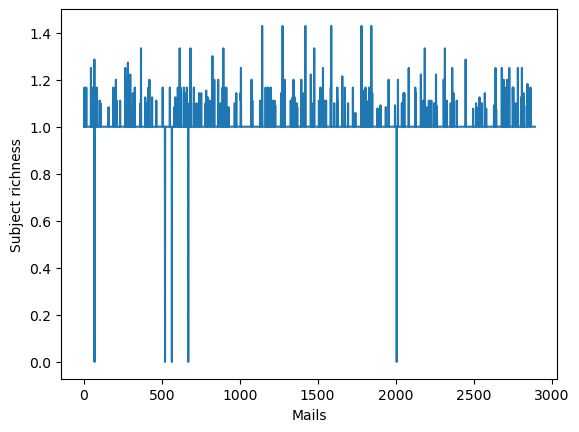

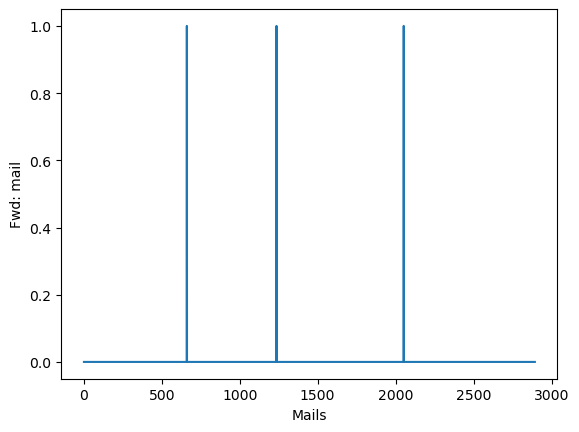

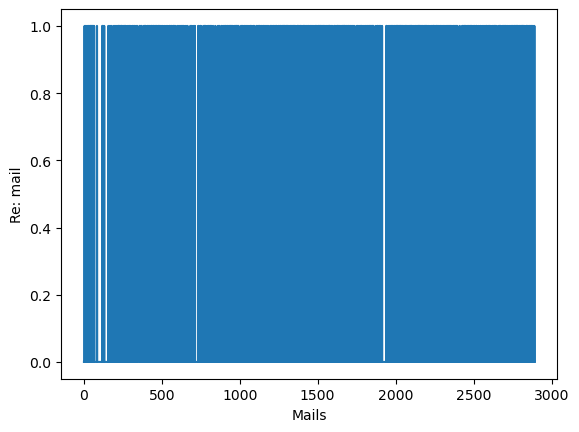

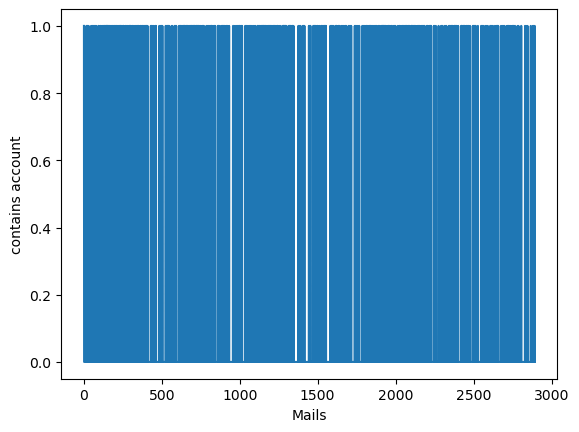

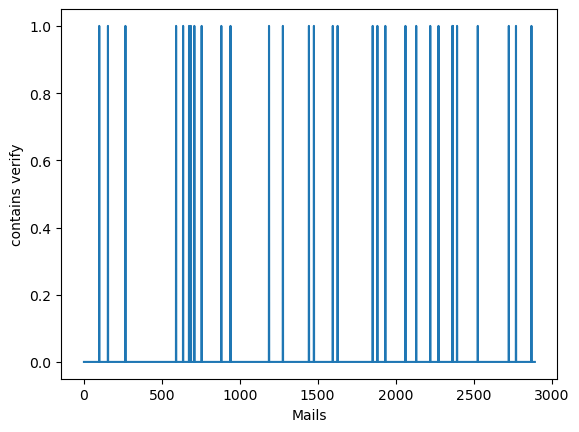

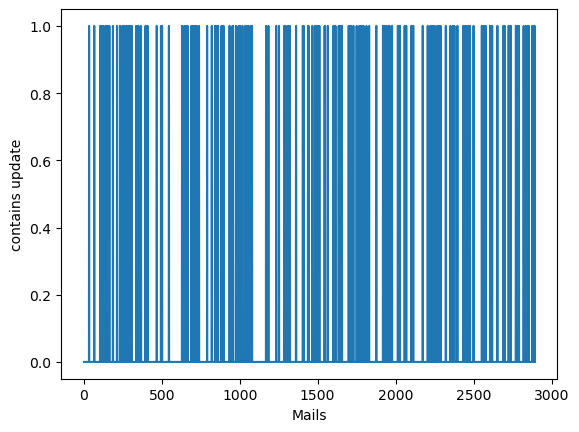

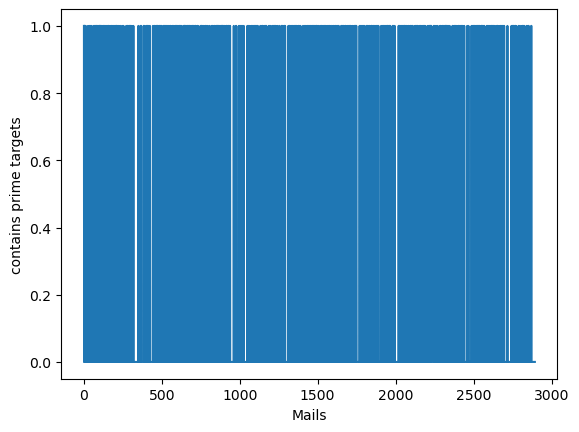

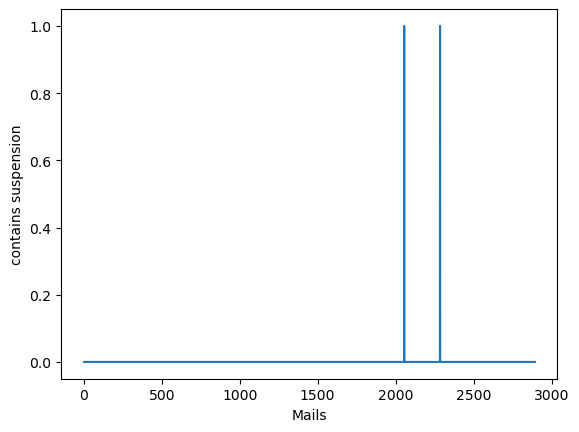

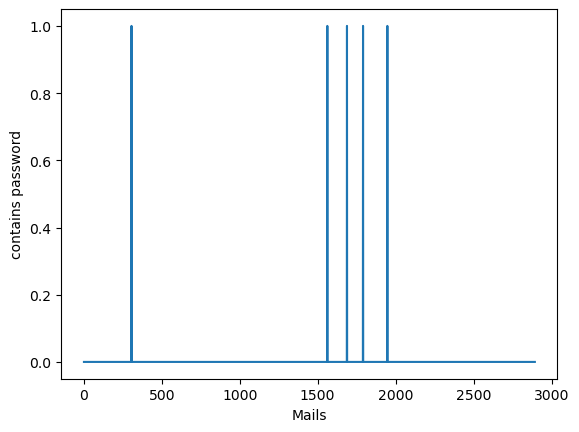

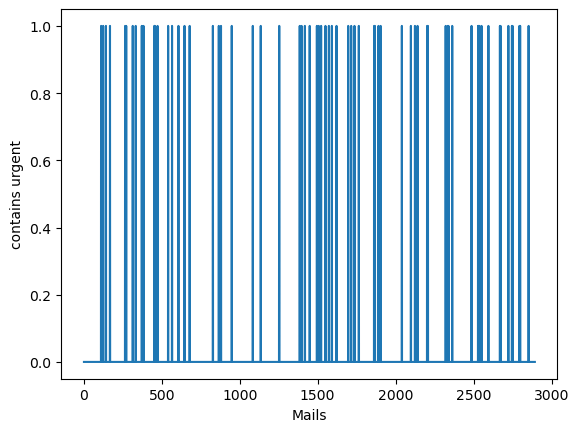

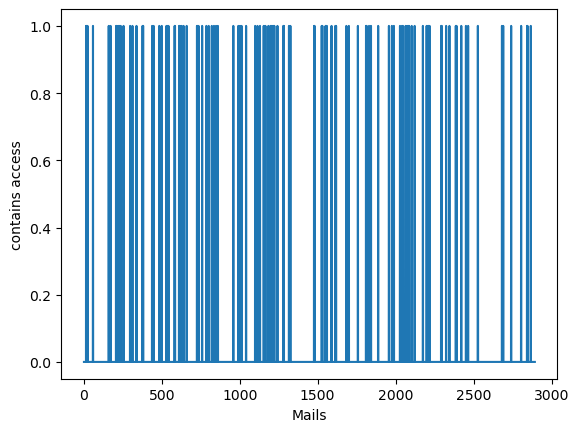

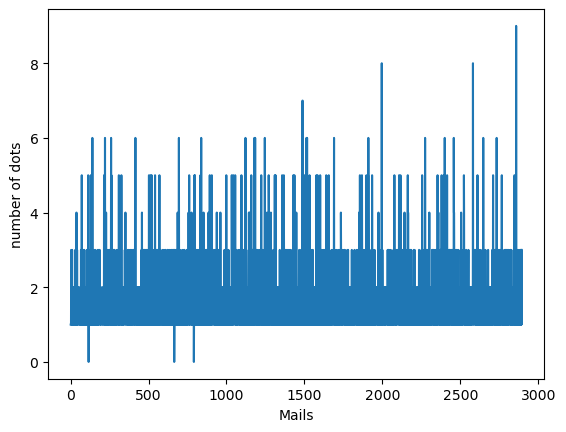

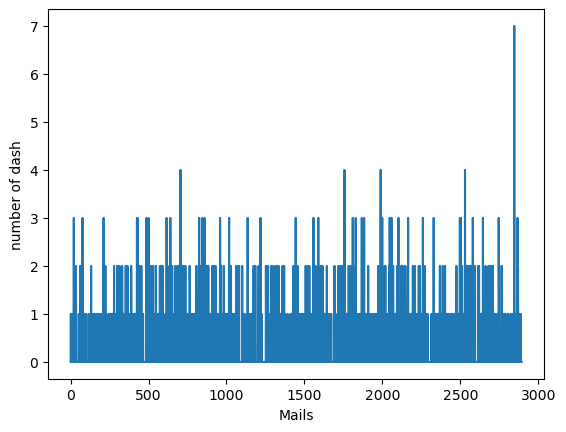

In [30]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_data():
        feature_val = np.array(mails).T
        fields = mails.columns
        xpoints = np.arange(1,len(mails)+1,1)
        for i in range(1,len(fields),1):
            ypoints = np.array(feature_val[i])
            plt.ylabel(fields[i]) 
            
            plt.xlabel("Mails")
            plt.plot(xpoints, ypoints)
            plt.show()
        
visualize_data()
#logger.debug("Matplotlib visualization done")

### Feature Selection

In [31]:
## Remove features with missing values
X_train.isnull().any().any()

False

#### Variance Filter

In [32]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.16))
sel.fit(X_train)
cols = sel.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
Selected_features_VarianceFilter = features_df_new.columns
Selected_features_VarianceFilter

Index(['HTML', 'body richness', 'Number of URLs', 'Malicious URL',
       'text link disparity', 'IP URLs', 'hexadecimal URL',
       'Maximum Domains Counts', 'Re: mail', 'contains account',
       'number of dots', 'number of dash'],
      dtype='object')

In [33]:
Filtered = X_train[Selected_features_VarianceFilter]

#### Feature Importance with Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
X_trainn = Filtered
model = RandomForestClassifier(random_state=42, max_depth=10)
model.fit(X_trainn,Y_train)

RandomForestClassifier(max_depth=10, random_state=42)

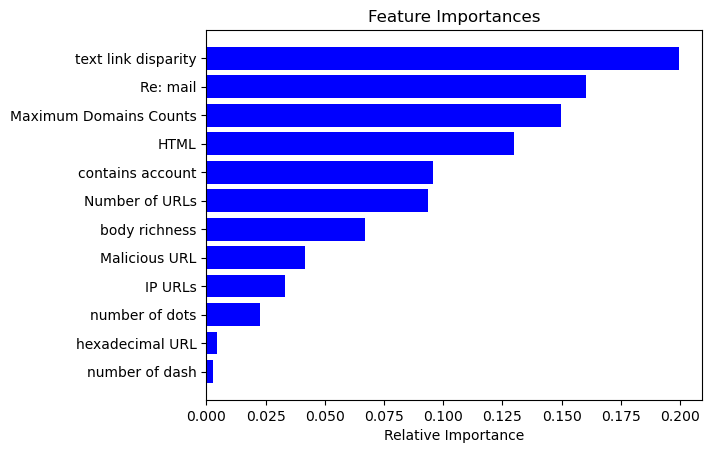

['text link disparity',
 'Re: mail',
 'Maximum Domains Counts',
 'HTML',
 'contains account',
 'Number of URLs',
 'body richness',
 'Malicious URL',
 'IP URLs',
 'number of dots',
 'hexadecimal URL',
 'number of dash']

In [35]:
features = X_trainn.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-13:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Selected_features_RandomForestClassifier = [features[index] for index in indices]
Selected_features_RandomForestClassifier.reverse()
Selected_features_RandomForestClassifier

#### Univariate using SelectKBest

In [36]:
#UNIVARIATE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = X_train, Y_train
selector = SelectKBest(chi2, k=11)
selector.fit(X,y)
# sel.scores_
cols = selector.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
Selected_features_Univariate = features_df_new.columns
Selected_features_Univariate 

Index(['HTML', 'General Salutation', 'mailto:', 'Number of URLs',
       'text link disparity', 'Attachments', 'IP URLs',
       'Maximum Domains Counts', 'Re: mail', 'contains account',
       'contains prime targets'],
      dtype='object')

UNION ALL SELECTED CANDIDATES

In [37]:
# Selected_features = ((Selected_features_RandomForestClassifier + Selected_features_Univariate) + Selected_features_VarianceFilter)
# # len(set(Selected_features))
Selected_features = []
Selected_features.extend(Selected_features_RandomForestClassifier) 
Selected_features.extend(Selected_features_Univariate)
Selected_features.extend(Selected_features_VarianceFilter)
Selected_features = set(Selected_features)
Selected_features

{'Attachments',
 'General Salutation',
 'HTML',
 'IP URLs',
 'Malicious URL',
 'Maximum Domains Counts',
 'Number of URLs',
 'Re: mail',
 'body richness',
 'contains account',
 'contains prime targets',
 'hexadecimal URL',
 'mailto:',
 'number of dash',
 'number of dots',
 'text link disparity'}

#### High Correlation Filter

<AxesSubplot:>

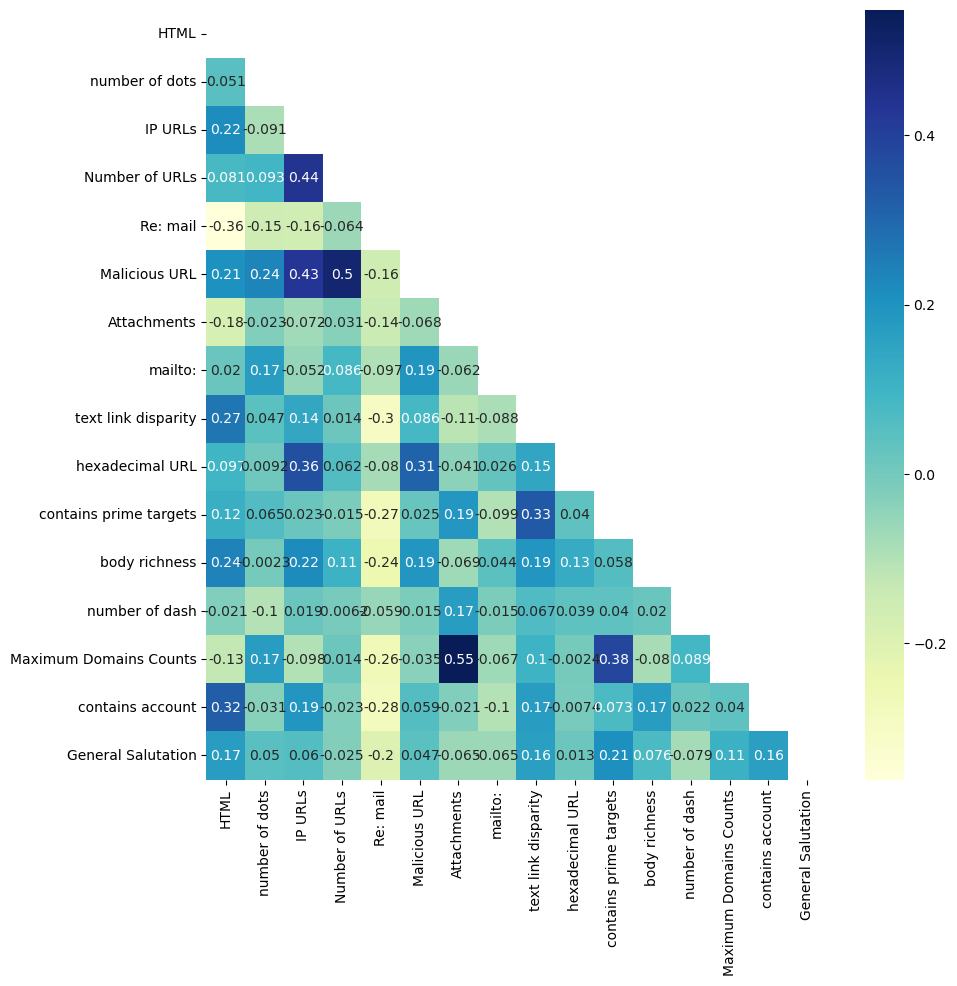

In [38]:
Filtered = X_train[Selected_features]
plt.figure(figsize = (10,10))
# creating mask
mask = np.triu(np.ones_like(Filtered.corr()))
  

sns.heatmap(Filtered.corr(),annot=True,cmap="YlGnBu", mask=mask)


In [39]:
Selected_features

{'Attachments',
 'General Salutation',
 'HTML',
 'IP URLs',
 'Malicious URL',
 'Maximum Domains Counts',
 'Number of URLs',
 'Re: mail',
 'body richness',
 'contains account',
 'contains prime targets',
 'hexadecimal URL',
 'mailto:',
 'number of dash',
 'number of dots',
 'text link disparity'}

This reveals that there is decent correlation between
- Number of URLs and IP URLs
- Maximum Domain Counts and Attachments
- Number of URLs and Malicious URLs
<br>We as until now I have 15 features and sacrificing 3 features would be not much beneficial, we will preserve this information.

Finally,we have all the **15 features selected for next phase i.e. model building.**

## Selecting Best Classifiers

In [40]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [41]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score,log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef,roc_auc_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from mlxtend.plotting import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold


In [42]:
# !pip3 install mlxtend

In [43]:
X_train = X_train[Selected_features]
X_test = X_test[Selected_features]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
def training_and_cross_validation(model):
    
    X = X_train
    y = Y_train

    skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

    accuracy_list = []
    conf_matrix_list = []

    for train_index, test_index in skf.split(X, y):
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
    
        Xtrain = sc.fit_transform(Xtrain)
        Xtest = sc.transform(Xtest)
        model.fit(Xtrain, ytrain)
        predictions = model.predict(Xtest)
        accuracy = accuracy_score(ytest, predictions)
        accuracy_list.append(accuracy)
        CM=confusion_matrix(ytest, predictions)
        conf_matrix_list.append(CM)

    avg_conf_matrix = np.array((pd.DataFrame(np.ceil(np.mean(conf_matrix_list, axis=0)))).astype(int))

    labels =['Ham','Phishing']

    fig, ax = plot_confusion_matrix(conf_mat=avg_conf_matrix,figsize=(4,4),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.title("Average Confusion Matrix after 10 fold validation ")
#     plt.show()
    print('\n')
    mean_accuracy = np.mean(accuracy_list)
    print("Total Average Accuracy is ",np.round(mean_accuracy*100,4),"%")
    return model

In [45]:
MCC = {}
LOG_LOSS = {}
BALANCED_ACCURACY = {}
ACCURACY = {}
F1 = {}
ROC_AUC = {}
REPORT = {}
MODEL = []

In [46]:

def show_performance_metrics(model,name,Xtest=X_test):
    predictions = model.predict(Xtest)
    
    
    if name == 'Voting Classifier(hard voting)':
            ll = 'N/A'
    else:
        train_predictions = model.predict_proba(Xtest)
        ll = log_loss(Y_test, train_predictions)
        ll = np.round((ll),3)
    
    
    report = classification_report(Y_test, predictions,labels=[0,1],digits=4)
    mcc = np.round(matthews_corrcoef(Y_test,predictions),3)
    
    roc_auc = np.round(roc_auc_score(Y_test, predictions)*100,3)
    accuracy = np.round(accuracy_score(Y_test, predictions)*100,3)
    balanced_accuracy = np.round(balanced_accuracy_score(Y_test, predictions)*100,3)
    f1 = np.round(f1_score(Y_test, predictions)*100,3)
    MCC[name] = mcc
    LOG_LOSS[name] = ll
    BALANCED_ACCURACY[name] = balanced_accuracy
    ACCURACY[name] = accuracy
    F1[name] = f1
    ROC_AUC[name] = roc_auc
    REPORT[name] = report
    labels = ["Ham","Phishing"]
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Y_test,predictions),figsize=(4,4),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    title = "Confusion Matrix : "+name
    plt.title(title)
    plt.show()    
    print(report)
    print("MCC: ",mcc)    
    print("Log Loss: ",ll)
    print('f1: ',f1)
    print('Balanced Accuracy: ',balanced_accuracy)
    print('Accuracy: ',accuracy)
    print('ROC_AUC : ', roc_auc)

In [47]:
# Libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [48]:
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=10)
MODEL=[]

After observing mean f1 score and mean error, it is decided to select following five models for hyperparameter tuning.
- SVC
- Logistic Regression
- Random Forest Classifier
- ExtraTrees Classifier
- Gradient Boosting


## Machine Learning Models

### Logistic Regression



Total Average Accuracy is  97.2689 %


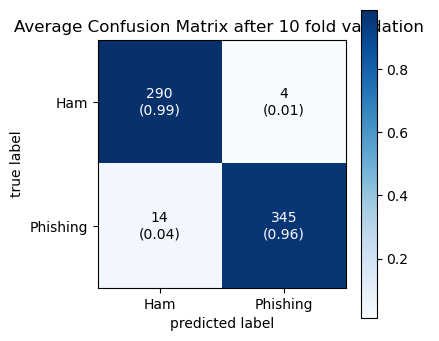

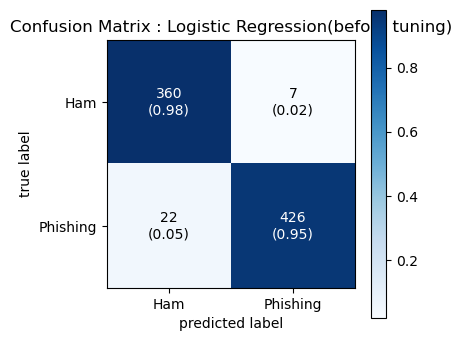

              precision    recall  f1-score   support

           0     0.9424    0.9809    0.9613       367
           1     0.9838    0.9509    0.9671       448

    accuracy                         0.9644       815
   macro avg     0.9631    0.9659    0.9642       815
weighted avg     0.9652    0.9644    0.9645       815

MCC:  0.929
Log Loss:  0.144
f1:  96.708
Balanced Accuracy:  96.591
Accuracy:  96.442
ROC_AUC :  96.591


In [49]:
lr = LogisticRegression()
lr = training_and_cross_validation(lr)
MODEL.append("Logistic Regression(before tuning)")
show_performance_metrics(lr,MODEL[-1])

### SVC



Total Average Accuracy is  97.852 %


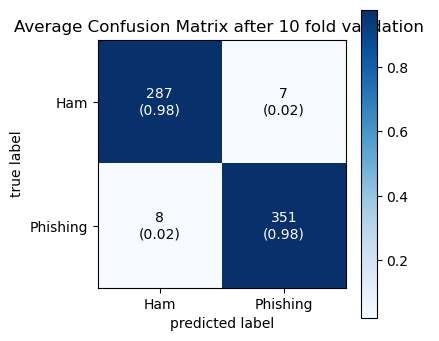

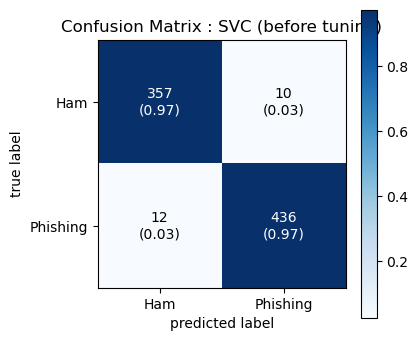

              precision    recall  f1-score   support

           0     0.9675    0.9728    0.9701       367
           1     0.9776    0.9732    0.9754       448

    accuracy                         0.9730       815
   macro avg     0.9725    0.9730    0.9728       815
weighted avg     0.9730    0.9730    0.9730       815

MCC:  0.946
Log Loss:  0.096
f1:  97.539
Balanced Accuracy:  97.298
Accuracy:  97.301
ROC_AUC :  97.298


In [50]:
svc = SVC(probability=True)
svc = training_and_cross_validation(svc)
MODEL.append('SVC (before tuning)')
show_performance_metrics(svc,MODEL[-1])

### Gradient Boosting



Total Average Accuracy is  98.1588 %


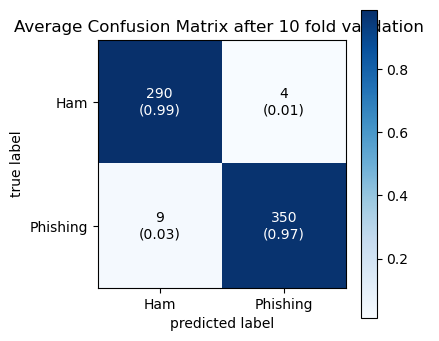

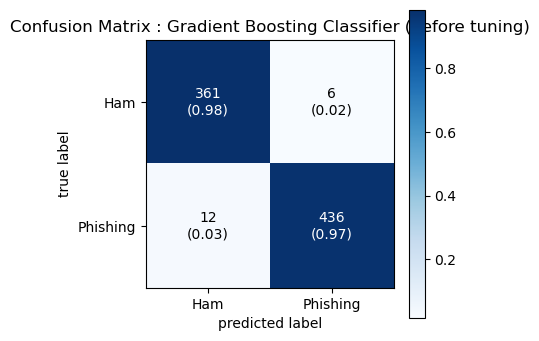

              precision    recall  f1-score   support

           0     0.9678    0.9837    0.9757       367
           1     0.9864    0.9732    0.9798       448

    accuracy                         0.9779       815
   macro avg     0.9771    0.9784    0.9777       815
weighted avg     0.9781    0.9779    0.9779       815

MCC:  0.956
Log Loss:  0.074
f1:  97.978
Balanced Accuracy:  97.843
Accuracy:  97.791
ROC_AUC :  97.843


In [51]:
gbc = GradientBoostingClassifier()
gbc = training_and_cross_validation(gbc)
MODEL.append('Gradient Boosting Classifier (before tuning)')
show_performance_metrics(gbc,MODEL[-1])

### ExtraTrees Classifier



Total Average Accuracy is  98.251 %


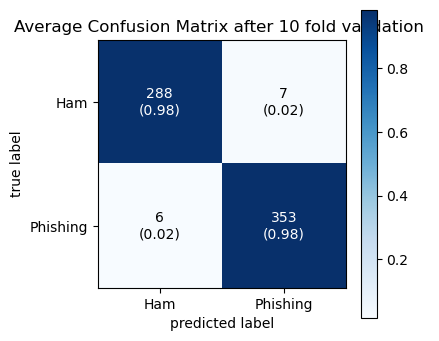

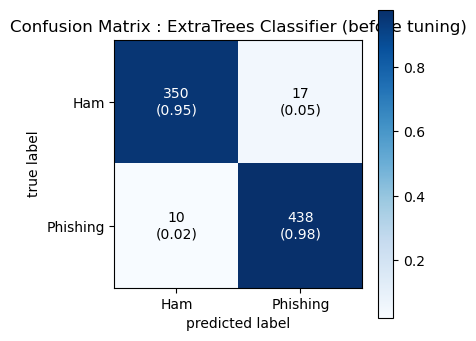

              precision    recall  f1-score   support

           0     0.9722    0.9537    0.9629       367
           1     0.9626    0.9777    0.9701       448

    accuracy                         0.9669       815
   macro avg     0.9674    0.9657    0.9665       815
weighted avg     0.9670    0.9669    0.9668       815

MCC:  0.933
Log Loss:  0.162
f1:  97.01
Balanced Accuracy:  96.568
Accuracy:  96.687
ROC_AUC :  96.568


In [52]:
extc = ExtraTreesClassifier()
extc = training_and_cross_validation(extc)
MODEL.append('ExtraTrees Classifier (before tuning)')
show_performance_metrics(extc,MODEL[-1])

### Random Forest Classifier



Total Average Accuracy is  98.4965 %


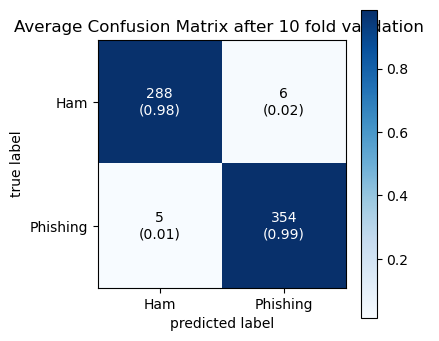

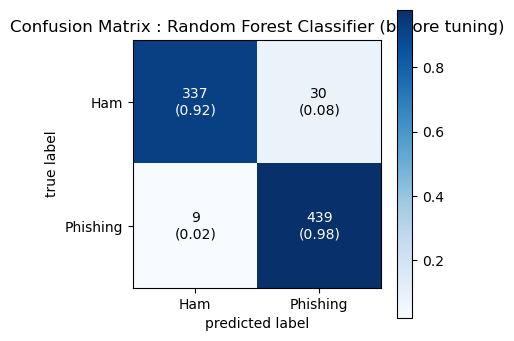

              precision    recall  f1-score   support

           0     0.9740    0.9183    0.9453       367
           1     0.9360    0.9799    0.9575       448

    accuracy                         0.9521       815
   macro avg     0.9550    0.9491    0.9514       815
weighted avg     0.9531    0.9521    0.9520       815

MCC:  0.904
Log Loss:  0.213
f1:  95.747
Balanced Accuracy:  94.908
Accuracy:  95.215
ROC_AUC :  94.908


In [53]:
rf_c = RandomForestClassifier()
rf_c  = training_and_cross_validation(rf_c )
MODEL.append('Random Forest Classifier (before tuning)')
show_performance_metrics(rf_c,MODEL[-1])

## Fine tuning selected models

In [54]:
kfold = 10

### ExtraTrees Classifier

In [55]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="balanced_accuracy", n_jobs= -1, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_


Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.985436852402245

ExtraTreesClassifier(max_features=1, min_samples_split=10)


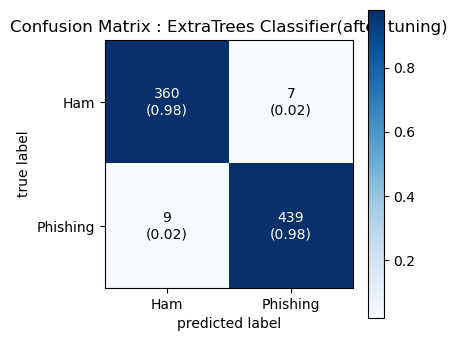

              precision    recall  f1-score   support

           0     0.9756    0.9809    0.9783       367
           1     0.9843    0.9799    0.9821       448

    accuracy                         0.9804       815
   macro avg     0.9800    0.9804    0.9802       815
weighted avg     0.9804    0.9804    0.9804       815

MCC:  0.96
Log Loss:  0.184
f1:  98.21
Balanced Accuracy:  98.042
Accuracy:  98.037
ROC_AUC :  98.042


In [56]:
MODEL.append("ExtraTrees Classifier(after tuning)")
print(ExtC_best)
show_performance_metrics(gsExtC,MODEL[-1],X_test)

### Random Forest Classifier

In [57]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini","entropy"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


0.9858857951864086

RandomForestClassifier(bootstrap=False, max_features=10, min_samples_split=3)


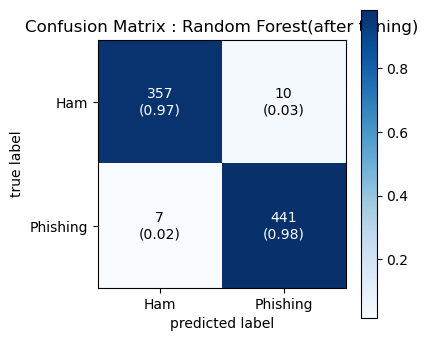

              precision    recall  f1-score   support

           0     0.9808    0.9728    0.9767       367
           1     0.9778    0.9844    0.9811       448

    accuracy                         0.9791       815
   macro avg     0.9793    0.9786    0.9789       815
weighted avg     0.9792    0.9791    0.9791       815

MCC:  0.958
Log Loss:  0.329
f1:  98.109
Balanced Accuracy:  97.856
Accuracy:  97.914
ROC_AUC :  97.856


In [58]:
# MODEL.append("Random Forest(after tuning)")
print(RFC_best)
show_performance_metrics(gsRFC,"Random Forest(after tuning)",X_test)

### Gradient Boosting

In [59]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.982203869749882

GradientBoostingClassifier(learning_rate=0.05, max_depth=8, max_features=0.3,
                           min_samples_leaf=100, n_estimators=200)


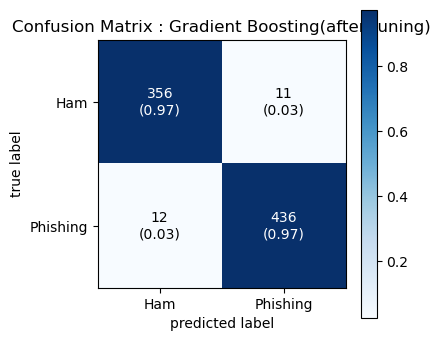

              precision    recall  f1-score   support

           0     0.9674    0.9700    0.9687       367
           1     0.9754    0.9732    0.9743       448

    accuracy                         0.9718       815
   macro avg     0.9714    0.9716    0.9715       815
weighted avg     0.9718    0.9718    0.9718       815

MCC:  0.943
Log Loss:  0.064
f1:  97.43
Balanced Accuracy:  97.162
Accuracy:  97.178
ROC_AUC :  97.162


In [60]:
MODEL.append("Gradient Boosting(after tuning)")
print(GBC_best)
show_performance_metrics(gsGBC,MODEL[-1],X_test)

### SVC

In [61]:


### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 2,3,5,0.5,0.2]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_



Fitting 10 folds for each of 24 candidates, totalling 240 fits


0.9794459650778669

SVC(C=2, gamma=0.1, probability=True)


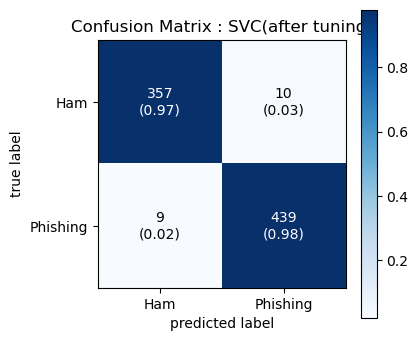

              precision    recall  f1-score   support

           0     0.9754    0.9728    0.9741       367
           1     0.9777    0.9799    0.9788       448

    accuracy                         0.9767       815
   macro avg     0.9766    0.9763    0.9764       815
weighted avg     0.9767    0.9767    0.9767       815

MCC:  0.953
Log Loss:  0.093
f1:  97.882
Balanced Accuracy:  97.633
Accuracy:  97.669
ROC_AUC :  97.633


In [62]:

print(SVMC_best)
show_performance_metrics(gsSVMC,"SVC(after tuning)",X_test)

### Logistic Regression

In [63]:
LR = LogisticRegression()

lr_param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                 'penalty' : ['l2'],
                 'C' : [1.0, 0.1, 1.5,2.5,5,5.5,0.01]}

gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gsLR.fit(X_train,Y_train)

LR_best = gsLR.best_estimator_

# Best score
gsLR.best_score_



Fitting 10 folds for each of 21 candidates, totalling 210 fits


0.973219442158453

LogisticRegression(C=0.1, solver='newton-cg')


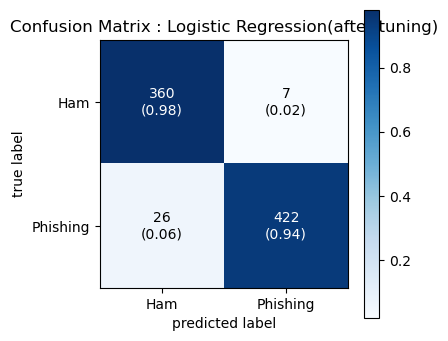

              precision    recall  f1-score   support

           0     0.9326    0.9809    0.9562       367
           1     0.9837    0.9420    0.9624       448

    accuracy                         0.9595       815
   macro avg     0.9582    0.9614    0.9593       815
weighted avg     0.9607    0.9595    0.9596       815

MCC:  0.92
Log Loss:  0.159
f1:  96.237
Balanced Accuracy:  96.145
Accuracy:  95.951
ROC_AUC :  96.145


In [64]:

print(LR_best)
show_performance_metrics(gsLR,"Logistic Regression(after tuning)",X_test)

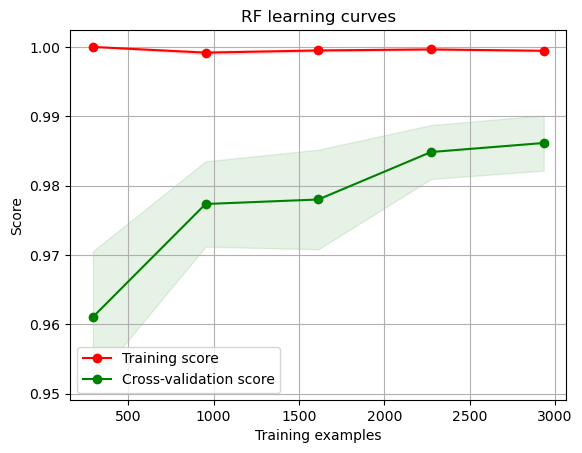

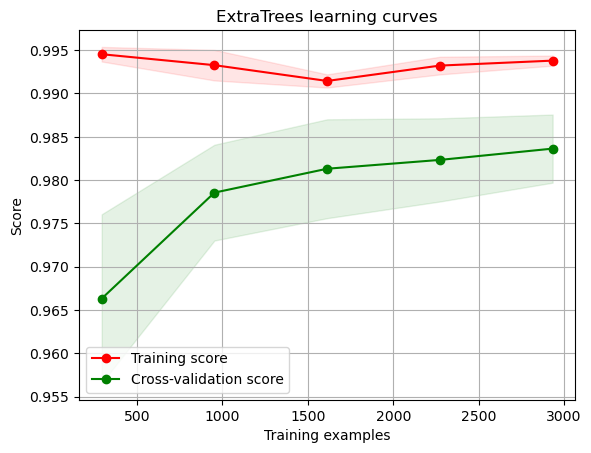

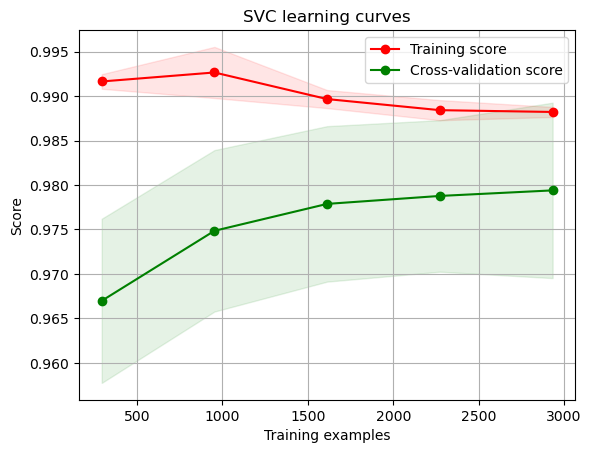

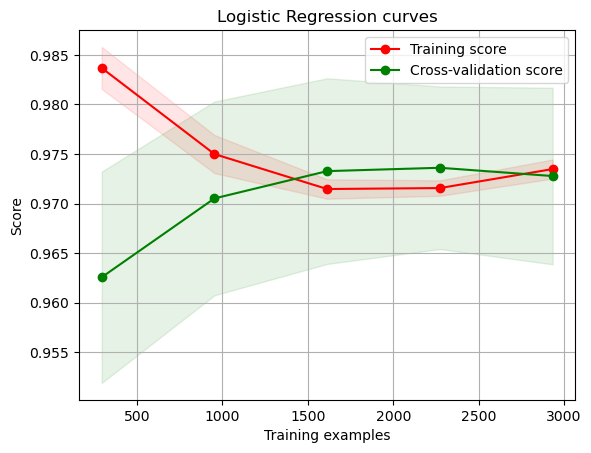

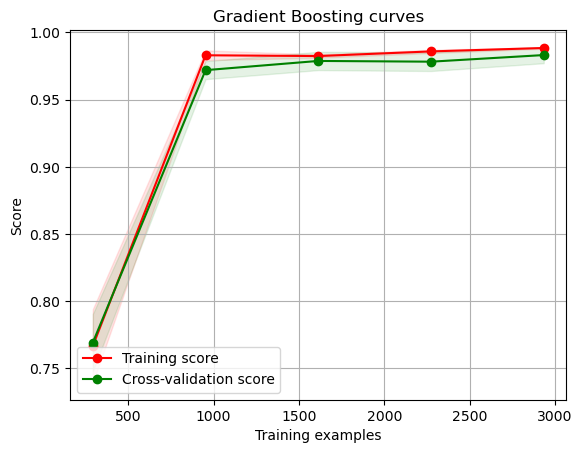

In [65]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,scoring='balanced_accuracy', train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
kfold = 10
g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsLR.best_estimator_,"Logistic Regression curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"Gradient Boosting curves",X_train,Y_train,cv=kfold)
# g = plot_learning_curve(soft_voting_model,"Voting Model learning curves",X_train,Y_train,cv=kfold)


Now, if we try to focus a bit on learning curve it reveals that:
- After a particular training size, SVC balances the bias and variance trade off and the curves are at almost same gap forward to the adequate training size.
- ExtraTrees also performed decent but after a point excess training leads to a slight increase in bias and then resulting underfitting.
- Random Forest also follows almost same trends as SVC, achieving decent balance between bias and variance.
- At last Logistic Regression and GradientBoosting are highly overfitting.<br><br>
So, for voting classifier we will go with three models:
- SVC (C=3, gamma=0.1, probability=True)
- ExtraTrees Classifier (max_features=1, min_samples_split=10, n_estimators=300)
- Random Forest Classifier (bootstrap=False, max_features=3, min_samples_leaf=3,min_samples_split=3)
<br>Above all three have good balanced accuracy and also do well on balancing the bias and variance trade off.

##  Ensemble Model (Voting Classifier)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits


Total Average Accuracy is  98.2509 %


VotingClassifier(estimators=[('Random Forest Model',
                              GridSearchCV(cv=10,
                                           estimator=RandomForestClassifier(),
                                           n_jobs=4,
                                           param_grid={'bootstrap': [False],
                                                       'criterion': ['gini',
                                                                     'entropy'],
                                                       'max_depth': [None],
                                                       'max_features': [1, 3,
                                                                        10],
                                                       'min_samples_leaf': [1,
                                                                            3,
                                                                            10],
                                                       'min_

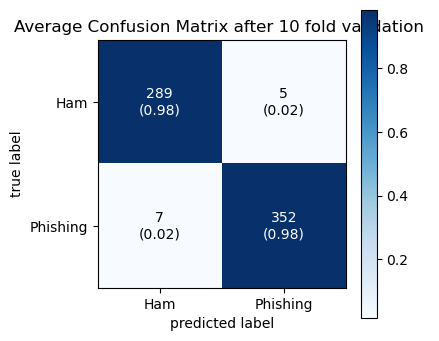

In [66]:
voting_model = VotingClassifier(
    [
        ("Random Forest Model", gsRFC),
        ("ExtraTrees Classifier",gsExtC),
        ("SVC",gsSVMC)
    ]
) 


training_and_cross_validation(voting_model)



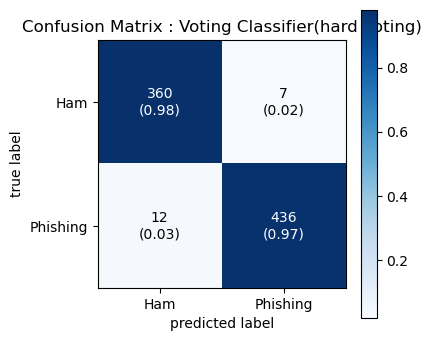

              precision    recall  f1-score   support

           0     0.9677    0.9809    0.9743       367
           1     0.9842    0.9732    0.9787       448

    accuracy                         0.9767       815
   macro avg     0.9760    0.9771    0.9765       815
weighted avg     0.9768    0.9767    0.9767       815

MCC:  0.953
Log Loss:  N/A
f1:  97.868
Balanced Accuracy:  97.707
Accuracy:  97.669
ROC_AUC :  97.707


In [67]:
MODEL.append("Voting Classifier(hard voting)")
show_performance_metrics(voting_model,"Voting Classifier(hard voting)")
   


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits


Total Average Accuracy is  98.4963 %


VotingClassifier(estimators=[('Random Forest Model',
                              GridSearchCV(cv=10,
                                           estimator=RandomForestClassifier(),
                                           n_jobs=4,
                                           param_grid={'bootstrap': [False],
                                                       'criterion': ['gini',
                                                                     'entropy'],
                                                       'max_depth': [None],
                                                       'max_features': [1, 3,
                                                                        10],
                                                       'min_samples_leaf': [1,
                                                                            3,
                                                                            10],
                                                       'min_

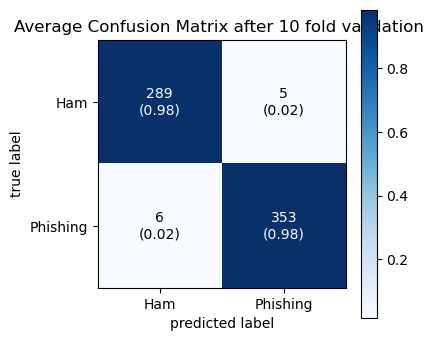

In [68]:
soft_voting_model = VotingClassifier(
    [
        ("Random Forest Model", gsRFC),
        ("ExtraTrees Classifier",gsExtC),
        ("SVC",gsSVMC)
    ],voting="soft",flatten_transform=True
)

training_and_cross_validation(soft_voting_model)



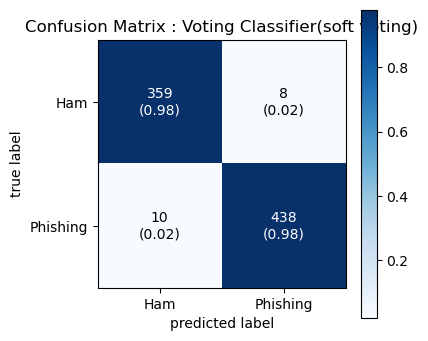

              precision    recall  f1-score   support

           0     0.9729    0.9782    0.9755       367
           1     0.9821    0.9777    0.9799       448

    accuracy                         0.9779       815
   macro avg     0.9775    0.9779    0.9777       815
weighted avg     0.9779    0.9779    0.9779       815

MCC:  0.955
Log Loss:  0.087
f1:  97.987
Balanced Accuracy:  97.794
Accuracy:  97.791
ROC_AUC :  97.794


In [69]:
MODEL.append("Voting Classifier(soft voting)")
show_performance_metrics(soft_voting_model,MODEL[-1])


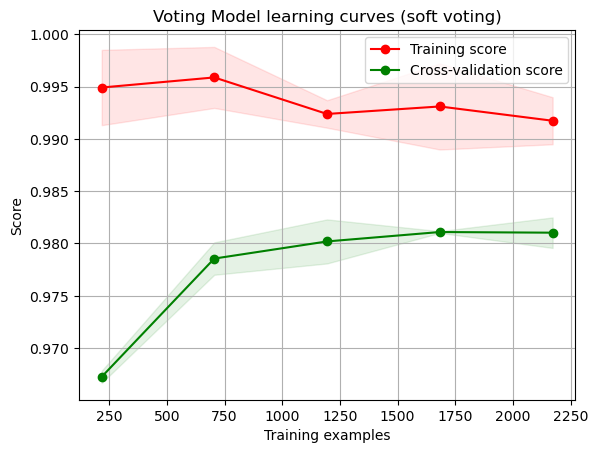

In [70]:
g = plot_learning_curve(soft_voting_model,"Voting Model learning curves (soft voting)",X_train,Y_train,cv=3,n_jobs=-1)

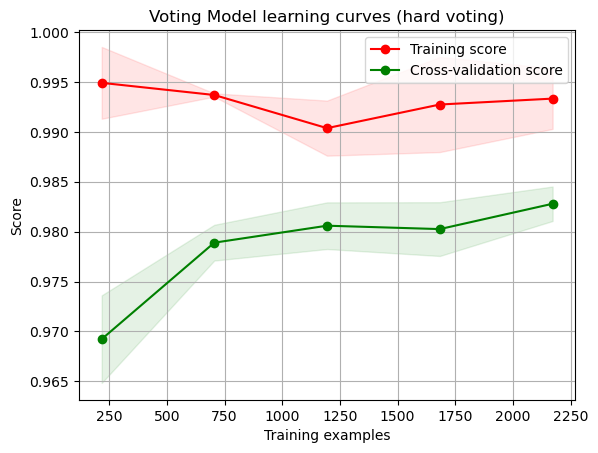

In [71]:
g = plot_learning_curve(voting_model,"Voting Model learning curves (hard voting)",X_train,Y_train,cv=3)

Both voting methods performed almost exactly same. Athough they have slight less accurate, yet they have very good balance in bias and variance trade off. They can be very useful in real world application as they tend not to overfit the training data while minimizing the gap between training and cross validation error. Thus, it could be inferred that they will perform better in real world application.

## Performance Comparisons

In [72]:
performance_comp = []
performance_comp.append(["Model","Accuracy","Balanced Accuracy","Log loss","F1 Score","MCC","ROC_AUC","Report"])
for model in MODEL:
    row = []
    row.append(model)
    row.append(ACCURACY[model])
    row.append(BALANCED_ACCURACY[model])
    row.append(LOG_LOSS[model])
    row.append(F1[model])
    row.append(MCC[model])
    row.append(ROC_AUC[model])
    row.append(REPORT[model])
    performance_comp.append(row)
performance_comp = pd.DataFrame(performance_comp[1:],columns=performance_comp[0])
performance_comp
# performance_comp.to_csv('performance comparision.csv')

,Model,Accuracy,Balanced Accuracy,Log loss,F1 Score,MCC,ROC_AUC,Report
0,Logistic Regression(before tuning),96.442,96.591,0.144,96.708,0.929,96.591,precision recall f1-score ...
1,SVC (before tuning),97.301,97.298,0.096,97.539,0.946,97.298,precision recall f1-score ...
2,Gradient Boosting Classifier (before tuning),97.791,97.843,0.074,97.978,0.956,97.843,precision recall f1-score ...
3,ExtraTrees Classifier (before tuning),96.687,96.568,0.162,97.010,0.933,96.568,precision recall f1-score ...
4,Random Forest Classifier (before tuning),95.215,94.908,0.213,95.747,0.904,94.908,precision recall f1-score ...
5,ExtraTrees Classifier(after tuning),98.037,98.042,0.184,98.210,0.960,98.042,precision recall f1-score ...
6,Gradient Boosting(after tuning),97.178,97.162,0.064,97.430,0.943,97.162,precision recall f1-score ...
7,Voting Classifier(hard voting),97.669,97.707,N/A,97.868,0.953,97.707,precision recall f1-score ...
8,Voting Classifier(soft voting),97.791,97.794,0.087,97.987,0.955,97.794,precision recall f1-score ...


In [73]:
import re
import sklearn

import seaborn as sns
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


y = performance_comp['Balanced Accuracy'].values
x = MODEL
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color =  performance_comp['Balanced Accuracy'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Balanced Accuracy comparison of models',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Balanced Accuracy',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')



In [74]:
import re
import sklearn

import seaborn as sns
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


y = performance_comp['MCC'].values
x = MODEL
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color =  performance_comp['MCC'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'MCC comparison of models',
    hovermode= 'closest',

    yaxis=dict(
        title= 'MCC',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')



In [75]:
import tensorflow as tf


In [76]:
!pip3 install tensorflow

## Conclusions

In [77]:
#%pip install tensorflow

In [78]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential

# Định nghĩa mô hình CNN
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình và đào tạo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


NameError: name 'num_words' is not defined

During the research both ExtraTrees Classifier and Random Forest were really close to each other performance wise. Although balanced accuracy of both the ExtraTrees Classifier and Random Forest are same yet Random Forest has good log loss score in comparison to ExtraTrees.<br><br>
Random Forest came out as the better model to identify the phishing mail considering the selected features than ExtraTrees as it has decent balance of bias and variance. SVC would also be a really good choice in real world as shown in research it smoothly balances the bias and variance tradeoff thus it learns while training still it doesn’t overfit and can perform really good in new data.<br><br>
The bar plot above shows how the models performed in terms of balanced accuracy score. We can see every model has improved the performance after tuning up.

Following inferences are made from the research :
1. Best performing model is hyperparameter tuned Random Forest Classifier with accuracy of 98.469% and log loss of 0.066.and parameters are (bootstrap=False,max_features=3,min_leaf_sample=3,min_sample_split=3)
2. Although Random Forest performed best in our research experiment, SVM and Voting Classifier turns out to be better in balancing bias and variance tradeoff.
3. Logistic Regression and Gradient Boosting tend to overfit so better to avoid or use in a way that can counter the overfitting. For example, we can include them in model stacking or voting classifier and counter the overfit by adjusting the weights.
4. Lastly, it is evident that to have better real world performing model we can go for Voting Classifier. We can have better performance to new test data while sacrificing minimal accuracy.

## Future Work

Feature selection techniques need more improvement to cope with the continuous development of new techniques by the phishers over the time. Therefore, it is recommended to developing a new automated tool in order to extract new features from new raw emails to improve the accuracy of detecting phishing email and to cope with the expanding with phisher techniques.